# Liquidity Regimes and the Death (and Return) of Valuations:
A 35-Year Quantitative Analysis of Factor Premiums (1990–2025)

## 2. High-Level Structure of the Paper

- Story – why this matters (intro + conclusion)
- Data – what you measure (markets, factors, liquidity proxies)
- Models – how you measure (liquidity index, regimes, cross-sectional tests)
- Portfolio – what to do with it (conditional allocation

## 3. Abstract (150–200 words)


- The “valuations don’t matter in infinite money printing” meme.
- Your construction of a liquidity index and liquidity regimes.
- Key findings:
 - Valuations do matter, but **conditional on liquidity regimes**.
 - Growth dominates in **high-liquidity, negative-real-rate regimes**.
 - Value premia revive after QT / real rate normalization.

Portfolio takeaway: a simple regime-aware factor-tilt model.

## 4. Motivation

- Narrative: post-GFC QE, ZIRP, NIRP, 2010–2021 “TINA”, tech bubble 2.0.
- > “We live in a world of infinite money printing, so valuations don’t matter.”
- Research question:
  > Do valuations truly die under abundant liquidity, or do they merely become regime-dependent?

- Do valuation spreads (cheap vs expensive deciles) expand under high-liquidity regimes and compress under tight liquidity?
- How do factor premia (value, momentum, quality, low vol) vary conditional on liquidity regimes?
- Can a macro-liquidity index predict the timing of factor rotations (growth vs value, long-duration vs short-duration equities)?
- Does a regime-aware factor allocation deliver better risk-adjusted returns than a static factor mix?

## 5. Intuition

- Valuation spread: the gap between cheap and expensive stocks (e.g., top vs bottom decile by B/M).
- Liquidity regime: periods of systematically easy vs tight financial conditions driven by monetary and fiscal variables.

## 6. Literature Sketch (very short)

- **Systemic Strategy**: Factor investing: value, momentum, quality.
- **Risk Factors and Risk premia**: Liquidity
- **Regime-switching**: macro-conditional factors.

## 7. Contributions

- Build a macro liquidity index from multiple public series.
- Use HMM / Markov regimes to label high vs low liquidity states.
- Show how valuation spreads and factor returns behave across liquidity regimes.
- Propose a simple implementable regime-aware factor strategy.

## **8. Data & Variables**

---

### **8.1 Timeframe & Frequency**

* Horizon: **1990–2025**, **monthly** frequency (or weekly if feasible).
* Market: US equities (CRSP/Compustat-type universe); optional robustness on AUS/EU.

---

### **8.2 Equity & Factor Data**

* Individual stock returns $r_{i,t}$, market cap, book equity, earnings, etc.
* Characteristics $X_{i,t}$:

$$
\text{B/M},\ \text{E/P},\ \text{P/S},\ \text{size},\ \beta,\ \text{12–1 momentum},\ \text{profitability},\ \text{volatility}.
$$

* Factor returns $f_t$:

$$
\text{MKT},\ \text{HML},\ \text{SMB},\ \text{MOM},\ \text{Quality},\ \text{LowVol}.
$$

Define a **valuation spread**:

$$
V_t^{\text{spread}} = \text{Long top decile of B/M} - \text{Short bottom decile}.
$$

---

### **8.3 Macro & Liquidity Variables**

Let raw macro/liquidity variables at time $t$ be $x_{j,t}$, including:

---

#### **Monetary & Balance Sheet**

* Money growth:
  $$\Delta \log(M2_t)$$

* Fed balance sheet growth:
  $$\Delta \log(\text{BS}_t)$$

---

#### **Rates & Term Structure**

* Short rate:
  $$i_t$$

* 10Y yield:
  $$y_{10,t}$$

* Slope:
  $$\text{TS}_t = y_{10,t} - i_t$$

* Real short rate:
  $$r_t^{\text{real}} = i_t - \pi_t^e$$

---

#### **Risk & Spreads**

* Credit spread:
  $$\text{CS}_t = y_{\text{Baa},t} - y_{\text{Aaa},t}$$

* VIX level:
  $$\text{VIX}_t$$

---

#### **Plumbing Variables (if available)**

* ON RRP usage
* TGA balance

---

All variables $x_{j,t}$ will then be standardized (e.g., z-scored) and aggregated into a **single liquidity index**.



## 9. Math

### 1. Liquidity Proxies & Standardisation

Let the raw liquidity indicators be collected in the vector

$$
x_t =
\begin{bmatrix}
x_{1,t} \\
x_{2,t} \\
\vdots \\
x_{J,t}
\end{bmatrix}
\in \mathbb{R}^J.
$$

For each series $$x_{j,t}$$, compute the sample mean
$$
\mu_j = \frac{1}{T} \sum_{t=1}^{T} x_{j,t}
$$
and variance
$$
\sigma_j^2 = \frac{1}{T-1} \sum_{t=1}^{T} (x_{j,t} - \mu_j)^2.
$$

Standardised variables are then
$$
z_{j,t} = \frac{x_{j,t} - \mu_j}{\sigma_j}, \qquad j = 1,\dots,J,
$$
with stacked vector $$z_t = (z_{1,t},\dots,z_{J,t})^\top$$.

Series may be sign-flipped so that higher values of $$z_{j,t}$$ correspond to easier liquidity; for example, use $$-r_t^{\text{real}}$$ instead of $$r_t^{\text{real}}$$, $$-CS_t$$ instead of $$CS_t$$, and $$-VIX_t$$ instead of $$VIX_t$$.

---

### 2. Example Macro / Liquidity Variables

Typical inputs include $$\Delta \log M2_t$$, $$\Delta \log \text{BS}_t$$, the term spread $$\text{TS}_t = y_{10,t} - i_t$$, the real rate $$r_t^{\text{real}} = i_t - \pi_t^e$$, and the credit spread $$\text{CS}_t = y_{Baa,t} - y_{Aaa,t}$$.

---

### 3. Covariance Matrix & PCA Liquidity Index

Define the covariance matrix
$$
\Sigma = \frac{1}{T} \sum_{t=1}^{T} z_t z_t^\top.
$$

Let $$(\lambda_k, v_k)$$ solve $$\Sigma v_k = \lambda_k v_k$$, with eigenvalues ordered $$\lambda_1 \ge \lambda_2 \ge \dots \ge \lambda_J$$. The first principal-component liquidity index is then $$L_t = v_1^\top z_t$$. Alternatively, one may use a fixed-weight index $$L_t = w^\top z_t$$.

---

### 4. HMM Liquidity Regimes

Let the latent regime variable satisfy $$s_t \in \{1,\dots,K\}$$, with regime-conditional dynamics
$$
L_t \mid (s_t = k) \sim \mathcal{N}(\mu_k, \sigma_k^2).
$$

Transition probabilities are $$\Pr(s_t = j \mid s_{t-1} = i) = p_{ij}$$, forming the matrix
$$
P =
\begin{bmatrix}
p_{11} & \cdots & p_{1K} \\
\vdots & \ddots & \vdots \\
p_{K1} & \cdots & p_{KK}
\end{bmatrix},
\qquad \sum_{j=1}^{K} p_{ij} = 1.
$$

Filtered or smoothed regime classification is given by
$$
\hat{s}_t = \arg\max_{k} \Pr(s_t = k \mid L_{1:T}).
$$

Define the high- and tight-liquidity regimes as $$k_{\text{High}} = \arg\max_k \mu_k$$ and $$k_{\text{Tight}} = \arg\min_k \mu_k$$, with indicator
$$
I_t^{\text{High}} = \mathbf{1}\!\left[\Pr(s_t = k_{\text{High}} \mid L_{1:T}) > 0.5\right].
$$

---

### 5. Multivariate Regime-Switching (Optional)

In a multivariate setting, define
$$
y_t =
\begin{bmatrix}
L_t \\
r_t^{\text{MKT}} \\
r_t^{\text{HML}} \\
\text{VIX}_t \\
\vdots
\end{bmatrix},
$$
with regime-dependent dynamics $$y_t = A_k y_{t-1} + \varepsilon_t^{(k)}$$ and $$\varepsilon_t^{(k)} \sim \mathcal{N}(0,\Sigma_k)$$ when $$s_t = k$$.

---

### 6. Valuation Spreads & Factor Returns by Regime

Let $$V_t^{\text{spread}}$$ denote a valuation-spread series (e.g., top–bottom decile). The regime-conditional mean is
$$
\bar{V}^{(k)} = \mathbb{E}[V_t^{\text{spread}} \mid s_t = k],
$$
with sample estimate
$$
\hat{\bar{V}}^{(k)} =
\frac{\sum_{t=1}^{T} V_t^{\text{spread}} \mathbf{1}(\hat{s}_t = k)}
{\sum_{t=1}^{T} \mathbf{1}(\hat{s}_t = k)}.
$$

Differences such as $$\hat{\bar{V}}^{(\text{High})} - \hat{\bar{V}}^{(\text{Tight})}$$ summarise regime effects. Analogously, for factor returns $$r_t^{(F)}$$,
$$
\bar{r}_F^{(k)} = \mathbb{E}[r_t^{(F)} \mid s_t = k],
$$
with Sharpe ratio $$\text{SR}_F^{(k)} = \hat{\bar{r}}_F^{(k)} / \hat{\sigma}_F^{(k)}$$.

---

### 7. Predictive Regressions with Liquidity

Continuous-index predictability is tested via
$$
r_{t+1}^{(F)} = \alpha + \beta L_t + \gamma^\top c_t + \varepsilon_{t+1},
$$
while regime-based predictability uses
$$
r_{t+1}^{(F)} =
\alpha
+ \delta_{\text{High}} I_t^{\text{High}}
+ \delta_{\text{Tight}} I_t^{\text{Tight}}
+ \delta_{\text{Neutral}} I_t^{\text{Neutral}}
+ \varepsilon_{t+1}.
$$

---

### 8. Cross-Sectional (Fama–MacBeth) by Regime

At each time $$t$$, estimate
$$
r_{i,t+1} =
\alpha_t
+ \lambda_{1,t}\text{Valuation}_{i,t}
+ \lambda_{2,t}\text{Size}_{i,t}
+ \lambda_{3,t}\text{Momentum}_{i,t}
+ \dots
+ \varepsilon_{i,t+1}.
$$

Regime-conditional slopes satisfy $$\bar{\lambda}_1^{(k)} = \mathbb{E}[\lambda_{1,t} \mid s_t = k]$$, with sample analogue
$$
\hat{\bar{\lambda}}_1^{(k)} =
\frac{\sum_{t=1}^{T} \lambda_{1,t} \mathbf{1}(\hat{s}_t = k)}
{\sum_{t=1}^{T} \mathbf{1}(\hat{s}_t = k)}.
$$

---

### 9. Regime-Aware Portfolio

Let $$f_t \in \mathbb{R}^K$$ denote factor returns and $$w^{(k)} \in \mathbb{R}^K$$ the regime-specific weights. The applied weights are $$w_t = w^{(\hat{s}_t)}$$, yielding portfolio return
$$
R_{p,t+1} = w_t^\top f_{t+1}.
$$


## PCA and Sparse-PCA

Standard PCA solves:

$$
\max_{v} \; \| X v \|^{2}
\quad \text{s.t.} \quad \| v \|^{2} = 1
$$


---

### **1. PCA wants the direction with maximum variance**

PCA tries to find the direction ( $v$ ) (a unit vector) along which the projected data ( $Xv$ ) has **maximum variance**.

Variance of the projection:

$$
\text{Var}(Xv) = \frac{1}{n} |Xv|^{2}.
$$

So maximizing variance is equivalent to maximizing ( $|Xv|^{2}$ ).

---

### **2. Why the constraint ( $| v |^{2} = 1$ )?**

Without this constraint, the problem would blow up:

$$
|X(\alpha v)|^{2} = \alpha^{2} |Xv|^{2},
$$

and the maximum would be infinite by choosing ( $\alpha$ \to $\infty$ ).

So PCA forces ( $v$ ) to be a **direction**, not a magnitude → a unit vector.

---

### **3. Reformulating using the covariance matrix**

$$
|Xv|^{2} = v^\top X^\top X v.
$$

Let:

$$
S = X^\top X
$$

(the unnormalized covariance matrix).
Then PCA solves:

$$
\max_{v} ; v^\top S v
\quad\text{s.t.}\quad v^\top v = 1.
$$

This is exactly the **Rayleigh quotient**.


### Intuition 

> PCA finds the direction (unit vector) along which the data cloud has **maximum spread**.
That direction is exactly the eigenvector of the covariance matrix with the largest eigenvalue.

---

## Sparse PCA


### 1. Standard PCA

* PCA rotates the data into orthogonal directions capturing maximum variance.
* Each principal component is a **linear combination of all variables**.
* Loadings are typically **dense** (every variable has some non-zero weight).
* This makes interpretation difficult:

> “PC1 of 127 economic multicolinear variables is 127-dimensional mush of everything.”

This is why PCA is almost never used directly for economic interpretation — PCs are not sparse.

---

### 2. What is *Sparse PCA*?

**Sparse PCA = PCA where most loadings are forced to be zero.**

Mathematically:

Standard PCA solves:

$$
\max_{v} \ |Xv|^2 \quad \text{s.t. } |v|_2 = 1
$$

Sparse PCA adds an **L1 penalty** (lasso-style sparsity) or constrains the number of non-zero elements:

$$
\max_{v} \ |Xv|^2 - \lambda |v|_1
$$

or equivalently:

$$
\max_{v} \ |Xv|^2 \quad \text{s.t. } |v|_2 = 1,\ |v|_1 \leq c
$$

This forces:

* Only a **small subset** of variables to load on each component.
* Components become **interpretable** (e.g., PC1 loads on CPI, PCE, core CPI → “inflation”).

The specific implementation cited (“penalized matrix decomposition” by Witten et al. 2009) solves:

$$
\max_{u, v} \ u^\top X v \quad
\text{s.t. } |u|_2 = 1,\ |v|_2 = 1,\ |v|_1 \le c
$$

This is a general sparse factor extraction algorithm.

Intuition: 
> Sparse PCA forces components to use **only the relevant variables**, not a smear across 127 series.

---

### Key Difference

- **Standard PCA components ≈ dense, uninterpretable mixtures**
- **Sparse PCA components ≈ targeted clusters of interpretable economic variables**

---

### Why sparse PCs become interpretable as macro factors

Take FRED-MD’s 127 macro series.

If you run *standard* PCA:

* PC1 loads on 100+ variables.
* PC2 loads on another 80+.
* Interpreting them is basically hopeless.

Sparse PCA, with lasso constraints:

* allows PC1 to load only on inflation-related variables
* PC2 to load only on housing-related variables
* PC3 on credit spreads
* PC4 on yields
* PC5 on production
* etc.

This resembles the **Stock–Watson macro factor model**, but with sparsity for interpretability.

---

### **Concrete example (how sparse PCs isolate macro themes)**

Suppose sparse PCA gives:

#### **Sparse PC1 loadings:**

| Variable                | Loading |
| ----------------------- | ------- |
| CPI YoY                 | 0.71    |
| Core CPI YoY            | 0.68    |
| PCE Deflator            | 0.66    |
| PCE core                | 0.64    |
| All other 123 variables | 0       |

-> You immediately label PC1 as **"inflation factor"**.

#### **Sparse PC2 loadings:**

| Variable              | Loading |
| --------------------- | ------- |
| Housing starts        | 0.62    |
| Building permits      | 0.59    |
| New homes sold        | 0.61    |
| Mortgage applications | 0.58    |
| Everything else       | 0       |

-> PC2 = **"housing & construction cycle"**

### **Sparse PC3 loadings:**

| Variable              | Loading |
| --------------------- | ------- |
| Corporate spreads (BAA–AAA) | 0.72 |
| High yield spread | 0.69 |
| Commercial paper spread | 0.64 |
| Others | 0 |

-> PC3 = **"credit stress"**

…and so on.

### This **does not happen** with standard PCA.

Sparse PCA essentially performs **dimension reduction + variable selection** simultaneously.

---

### How sparse PCA yields *domain-specific macro factors*

Sparse PCA encourages:

* **grouping** variables that co-move strongly
* **dropping** variables unrelated to the theme
* **choosing** a small number of representative series

Given economic data naturally clusters (inflation variables co-move, housing variables co-move), sparse PCA isolates these clusters.

This is similar to economic intuition:

* inflationary variables form a single latent factor
* spreads form a financial stress factor
* yields form a term-structure factor
* employment variables form a labor factor

Sparse PCA “discovers” these clusters automatically.

---

### Why does this matter

**Sparse PCA → interpretable macro drivers → better regime classification → better factor conditioning.**

Especially when constructing a **macro liquidity index** or **financial conditions index**.

Sparse PCA gives:

| Component | Interpretation               |
| --------- | ---------------------------- |
| PC1       | Liquidity / money conditions |
| PC2       | Credit spreads               |
| PC3       | Housing activity             |
| PC4       | Yield curve / rates          |
| PC5       | Employment                   |
| PC6       | Production                   |
| PC7       | Income                       |
| PC8       | Market stress                |

These are exactly the components McCracken & Ng (2016) find in FRED-MD.

---

### TL;DR — The clean intuition

### **Standard PCA**

* Dense loadings
* Hard to interpret
* PCs are linear mush

### **Sparse PCA**

* Forces many loadings to zero
* Each PC focuses on a small cluster of variables
* Becomes interpretable as a “macro theme”
* Matches how economists think about the business cycle
* Perfect for regime classification & factor research

### Sparse PCs are explainable because:

* Economic data naturally clusters into themes
* Sparse PCA forces components to choose only the strongest cluster
* This matches known macro factors (inflation, employment, credit, etc.)


In [132]:
# !pip install pandas pandas_datareader numpy scikit-learn hmmlearn matplotlib

import pandas as pd
import numpy as np
from pandas_datareader import data as pdr

from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler

from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt


## Config: Date Range & Series

In [133]:
start_date = "1990-01-01"
end_date   = "2025-12-31"

# --- FRED series codes ---
FRED_SERIES = {
    "M2SL":   "M2SL",      # M2 money stock (monthly, SA)
    "FED_BAL":"WALCL",     # Fed balance sheet total assets (weekly)
    "TB3M":   "TB3MS",     # 3-Month T-Bill rate (monthly)
    "DGS10":  "DGS10",     # 10-Year Treasury yield (daily -> resample monthly)
    "BAA":    "BAA",       # Moody's Baa corporate yield (monthly)
    "AAA":    "AAA",       # Moody's Aaa corporate yield (monthly)
    "CPI":    "CPIAUCSL",  # CPI index (monthly, SA)
    "GDP":    "GDP",       # Nominal GDP (quarterly, SAAR)
}

# For equity factors: Fama-French via pandas_datareader (famafrench)
FF_FACTORS_DATASET = "F-F_Research_Data_5_Factors_2x3"


## Download Macro & Liquidity Variables from FRED

In [134]:
def download_fred_series(series_dict, start, end):
    """
    Download FRED series into a single monthly DataFrame.

    Parameters
    ----------
    series_dict : dict
        Mapping logical_name -> FRED code.
    """
    dfs = []
    for name, code in series_dict.items():
        print(f"Downloading {name} ({code}) from FRED...")
        s = pdr.DataReader(code, "fred", start, end)
        s = s.rename(columns={code: name})
        dfs.append(s)

    df = pd.concat(dfs, axis=1)
    # Ensure monthly freq by end-of-month sampling
    df = df.resample("M").last()
    return df

macro_raw = download_fred_series(FRED_SERIES, start_date, end_date)
macro_raw.head()


,M2SL,FED_BAL,TB3M,DGS10,BAA,AAA,CPI,GDP
DATE,,,,,,,,
1990-01-31,3166.8,NaN,7.64,8.43,9.94,8.99,127.5,5872.701
1990-02-28,3179.2,NaN,7.74,8.51,10.14,9.22,128.0,NaN
1990-03-31,3190.1,NaN,7.90,8.65,10.21,9.37,128.6,NaN
1990-04-30,3201.6,NaN,7.77,9.04,10.30,9.46,128.9,5960.028
1990-05-31,3200.6,NaN,7.74,8.60,10.41,9.47,129.1,NaN


In [135]:
macro_raw.tail()

,M2SL,FED_BAL,TB3M,DGS10,BAA,AAA,CPI,GDP
DATE,,,,,,,,
2025-08-31,22108.3,6603384.0,4.12,4.23,6.00,5.35,323.364,NaN
2025-09-30,22212.4,6608395.0,3.92,4.16,5.83,5.21,324.368,NaN
2025-10-31,22298.0,6587034.0,3.82,4.11,5.74,5.13,NaN,NaN
2025-11-30,22322.4,6552419.0,3.78,4.02,5.86,5.26,325.031,NaN
2025-12-31,NaN,6640618.0,3.59,4.18,5.90,5.31,326.030,NaN


### Transform Raw Macro Series into $J$ Liquidity Proxies $x_t$
$ x_t = \begin{bmatrix}
x_{1,t} \
x_{2,t} \
\vdots \
x_{J,t}
\end{bmatrix} \in \mathbb{R}^J $

- Money & balance sheet growth: $\Delta \log(\cdot)$
- Term spread: $y_{10} - i_{3m}$
- Real short rate: $i_{3m} - \pi_{\text{year-on-year}}$
- Credit spread: $\text{BAA} - \text{AAA}$
- etc.​


In [138]:
def build_liquidity_proxies(macro_df: pd.DataFrame) -> pd.DataFrame:
    df = macro_df.copy()

    # 1. Growth of M2 and Fed balance sheet
    df["dlog_M2"] = np.log(df["M2SL"]).diff()
    df["dlog_FED_BAL"] = np.log(df["FED_BAL"]).diff()

    # 2. Term structure: 10Y - 3M
    df["term_spread"] = df["DGS10"] - df["TB3M"]

    # 3. Year-on-year inflation (CPI yoy)
    df["infl_yoy"] = np.log(df["CPI"]).diff(12)

    # 4. Real short rate: nominal 3M - inflation
    df["real_rate"] = df["TB3M"] - (100 * df["infl_yoy"])  # TB3M in %, infl_yoy in log -> approx*100

    # 5. Credit spread: BAA - AAA
    df["credit_spread"] = df["BAA"] - df["AAA"]

    # Drop rows with NaNs from diff(12) etc.
    proxies = df[["dlog_M2", "dlog_FED_BAL", "term_spread",
                  "real_rate", "credit_spread"]].dropna()

    return proxies

liquidity_proxies = build_liquidity_proxies(macro_raw)

In [141]:
liquidity_proxies.head()

,dlog_M2,dlog_FED_BAL,term_spread,real_rate,credit_spread
DATE,,,,,
2003-01-31,0.005642,-0.026648,2.83,-1.550123,1.18
2003-02-28,0.006192,0.012784,2.54,-1.927593,1.11
2003-03-31,0.003448,0.004200,2.70,-1.850353,1.06
2003-04-30,0.006302,0.028922,2.76,-1.021807,1.11
2003-05-31,0.010075,-0.001875,2.30,-0.806435,1.16


### Standardize, Sign-Flip and Stack Liquidity Proxies to Get $z_{j,t}$
We want higher $z_{j,t}$ -- to mean easier liquidity.

- Growth of M2 / Fed balance sheet: already “easier = higher value” -> keeping sign
- Term spread: steeper (more positive) often associated with easier conditions -> keeping sign
- Real rate: easier liquidity when real rates are low -> flipping sign
- Credit spread: easier liquidity when spreads are tight (low) -> flipping sign

In [305]:
def standardize_and_signflip(proxies: pd.DataFrame) -> pd.DataFrame:
    """
    Standardize each column and flip signs so that higher z_{j,t}
    always corresponds to easier liquidity.
    
    Parameters
    ----------
    proxies : pd.DataFrame
        Liquidity proxy variables including flows, stocks, and momentum terms
    
    Returns
    -------
    pd.DataFrame
        Standardized and sign-adjusted proxies
    """
    z = proxies.copy()
    
    # Standardize all variables to z-scores
    scaler = StandardScaler()
    z_vals = scaler.fit_transform(z)
    z = pd.DataFrame(z_vals, index=z.index, columns=z.columns)
    
    # Sign flips so "higher" = easier liquidity
    sign_flips = {
        # ==========================================
        # FLOW VARIABLES (month-over-month changes)
        # ==========================================
        "dlog_M2": +1,          # Higher M2 growth = easier
        "dlog_FED_BAL": +1,     # Higher Fed BS growth = easier
        "term_spread": +1,      # Steeper yield curve = easier
        "real_rate": -1,        # Higher real rate = TIGHTER → flip to negative
        "credit_spread": -1,    # Higher credit spread = TIGHTER → flip to negative
        
        # ==========================================
        # STOCK/LEVEL VARIABLES (deviations from trend)
        # ==========================================
        "EM": +1,               # Excess M2 above trend = easier
        "EB": +1,               # Excess Fed BS above trend = easier
        "EL_3y": +1,            # 3-year excess liquidity vs GDP = easier
        "ZIRP_dummy": +1,       # In ZIRP regime = easier
        
        # ==========================================
        # MOMENTUM VARIABLES (rate of change)
        # ==========================================
        "dL_3m": +1,            # Increasing excess M2 = easier
        "dL_12m": +1,           # 12-month acceleration in excess M2 = easier
        "dEB_dt": +1,           # Accelerating Fed BS expansion = easier
        "accel_ZIRP": +1,       # Entering ZIRP (0→1) = easier; Exiting (1→0) = tighter
        
        # Optional: Add second derivatives if included
        "d2L_dt2": +1,          # Positive acceleration = easier
        "vol_L": -1,            # Higher volatility = uncertainty = tighter
    }
    
    # Apply sign flips to all present columns
    for col, sgn in sign_flips.items():
        if col in z.columns:
            z[col] = sgn * z[col]
        # else:
        #     # Optionally warn if expected column is missing
        #     print(f"Warning: Expected column '{col}' not found in proxies")
    
    return z

z_t = standardize_and_signflip(liquidity_proxies)

In [186]:
z_t.tail()

,dlog_M2,dlog_FED_BAL,term_spread,real_rate,credit_spread
DATE,,,,,
2025-06-30,0.054918,-0.226158,-1.082298,-1.208083,0.782405
2025-07-31,-0.162427,-0.256413,-0.996504,-1.189743,0.879895
2025-08-31,-0.213553,-0.325854,-1.004304,-1.027790,0.879895
2025-09-30,-0.035859,-0.169662,-0.902911,-0.890559,0.953012
2025-11-30,-0.623037,-0.310671,-0.902911,-0.969690,1.001756


### Sparse PCA Liquidity Index $L_{t}$

In [140]:
pd.Series(z_t.index).describe()

count                              274
mean     2014-06-15 16:38:32.408759040
min                2003-01-31 00:00:00
25%                2008-10-07 18:00:00
50%                2014-06-15 00:00:00
75%                2020-02-21 18:00:00
max                2025-11-30 00:00:00
Name: DATE, dtype: object

In [10]:
z_t.values

array([[ 0.1180247 , -0.81081346,  1.11713917,  0.32626822, -0.41183909],
       [ 0.20761695,  0.11166407,  0.89095592,  0.51056885, -0.24123275],
       [-0.23943481, -0.08914208,  1.01574668,  0.47285631, -0.11937107],
       ...,
       [-0.21355338, -0.32585415, -1.00430373, -1.0277896 ,  0.87989467],
       [-0.03585918, -0.1696623 , -0.90291124, -0.89055947,  0.95301167],
       [-0.62303684, -0.31067073, -0.90291124, -0.96969022,  1.00175634]])

In [333]:
def build_sparse_pca_liquidity_index(z_df: pd.DataFrame,
                                     alpha: float = 1.0,
                                     random_state: int = 42,
                                    n_check: int = 3) -> pd.Series:
    """
    Apply SparsePCA with 1 component to z_{j,t} to obtain L_t.
    """
    spca = SparsePCA(
        n_components=1,
        alpha=alpha,
        random_state=random_state
    )

    L_scores = spca.fit_transform(z_df.values)
    L = pd.Series(L_scores.flatten(), index=z_df.index, name="L")

    # Get loadings
    loadings = spca.components_[0]
    
    print("SparsePCA components (loadings):")
    loading_dict = {}
    for coef, col in zip(loadings, z_df.columns):
        print(f"  {col}: {coef:+.3f}")
        loading_dict[col] = coef

    # ========================================
    # WEIGHTED VOTING FOR SIGN ENFORCEMENT
    # ========================================
    # Get top N variables by absolute loading
    abs_loadings = np.abs(loadings)
    top_indices = np.argsort(abs_loadings)[-n_check:][::-1]  # Top n_check, descending
    
    print(f"\nTop {n_check} variables by absolute loading:")
    
    # Weighted voting: correlation * absolute loading
    weighted_corr_sum = 0
    total_weight = 0
    
    for idx in top_indices:
        var = z_df.columns[idx]
        weight = abs_loadings[idx]
        corr = np.corrcoef(L, z_df[var])[0, 1]
        weighted_corr = corr * weight
        
        print(f"  {var}: loading={loadings[idx]:+.3f}, corr={corr:+.3f}, weighted={weighted_corr:+.3f}")
        
        weighted_corr_sum += weighted_corr
        total_weight += weight
    
    # Average weighted correlation
    avg_weighted_corr = weighted_corr_sum / total_weight
    
    print(f"\nWeighted average correlation: {avg_weighted_corr:+.3f}")
    
    # Flip if weighted average is negative
    if avg_weighted_corr < 0:
        print("⚠️  FLIPPING SIGN: L_t weighted correlation negative")
        L = -L
    else:
        print("✅ Sign correct: L_t weighted correlation positive")

    return L

L_t = build_sparse_pca_liquidity_index(z_t, alpha=0.5)


SparsePCA components (loadings):
  dlog_M2: +0.429
  dlog_FED_BAL: +0.524
  term_spread: +0.493
  real_rate: +0.390
  credit_spread: -0.383

Top 3 variables by absolute loading:
  dlog_FED_BAL: loading=+0.524, corr=+0.698, weighted=+0.366
  term_spread: loading=+0.493, corr=+0.658, weighted=+0.324
  dlog_M2: loading=+0.429, corr=+0.577, weighted=+0.248

Weighted average correlation: +0.649
✅ Sign correct: L_t weighted correlation positive


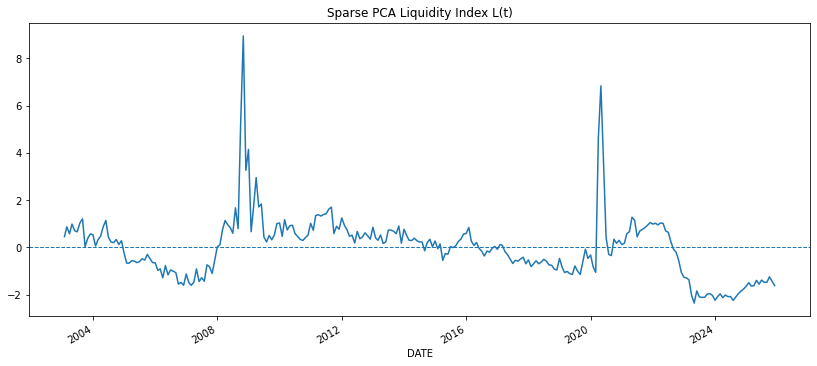

In [334]:
L_t.plot(title="Sparse PCA Liquidity Index L(t)", figsize=(14, 6))
plt.axhline(0, linestyle="--", linewidth=1)
plt.show()

### HMM / Markov Regime Detection on $L_t$
​Fit a Gaussian HMM on the liquidity index. 2 or 3 regimes ?

In [193]:
from hmmlearn.hmm import GaussianHMM
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

def fit_hmm_on_liquidity(
    L: pd.Series,
    n_states: int = 3,
    covariance_type: str = "full",
    random_state: int = 42,
    standardize: bool = True
):
    """
    Fit a Gaussian HMM on L(t) and return the model and a DataFrame
    with inferred regimes and posterior probabilities.

    Parameters
    ----------
    L : pd.Series
        Liquidity index (indexed by date).
    n_states : int
        Number of hidden states (regimes).
    standardize : bool
        If True, standardize L before fitting the HMM.

    Returns
    -------
    model : GaussianHMM
    df_regime : pd.DataFrame
        Columns: L, state, p_state_k, state_label
    """

    # 1) Prepare X
    X = L.values.reshape(-1, 1)

    scaler = None
    if standardize:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    # 2) Fit HMM
    model = GaussianHMM(
        n_components=n_states,
        covariance_type=covariance_type,
        random_state=random_state,
        n_iter=500
    )
    model.fit(X)

    hidden_states = model.predict(X)
    post_probs = model.predict_proba(X)  # T x n_states

    # 3) Build output DataFrame on original index
    df_regime = pd.DataFrame(
        {"L": L, "state": hidden_states},
        index=L.index
    )
    for k in range(n_states):
        df_regime[f"p_state_{k}"] = post_probs[:, k]

    # 4) Use state means to order regimes
    means = pd.Series(model.means_.flatten(), index=range(n_states))

    print("HMM state means (unsorted, in fitted scale):")
    for k, m in means.items():
        print(f"  state {k}: mean L = {m:.3f}")

    # Order states from low liquidity to high liquidity
    ordering = means.sort_values().index.tolist()

    state_label_map = {}
    if n_states == 3:
        state_label_map[ordering[0]] = "Tight"
        state_label_map[ordering[1]] = "Neutral"
        state_label_map[ordering[2]] = "High"
    elif n_states == 2:
        state_label_map[ordering[0]] = "Tight"
        state_label_map[ordering[1]] = "High"
    else:
        # Generic labels if you ever use more states
        for i, s in enumerate(ordering):
            state_label_map[s] = f"Regime_{i}"

    df_regime["state_label"] = df_regime["state"].map(state_label_map)

    return model, df_regime

In [194]:
n_states = 3
model, regimes_df = fit_hmm_on_liquidity(L_t,n_states)

HMM state means (unsorted, in fitted scale):
  state 0: mean L = 2.689
  state 1: mean L = 0.379
  state 2: mean L = -0.861


In [195]:
regimes_df.tail(1)

,L,state,p_state_0,p_state_1,p_state_2,state_label
DATE,,,,,,
2025-11-30,-1.620391,2,0.000292,2.068795e-07,0.999708,Tight


In [196]:
means = pd.Series(model.means_.flatten(), index=range(n_states))
var_covar = pd.Series(model._covars_.flatten(), index=range(n_states))

model_df = pd.DataFrame({'means': means, 'var': var_covar})
model_df

,means,var
0,2.689160,3.067263
1,0.378674,0.112808
2,-0.860576,0.190807


In [197]:
def calculate_regime_summary(regimes_df, L_series, state_col='state_label'):
    """
    Calculate summary statistics for regime table.
    """
    
    summary = []
    for state in sorted(regimes_df[state_col].unique()):
        state_mask = regimes_df[state_col] == state
        L_values = L_series[state_mask]
        
        n_months = state_mask.sum()
        pct_months = 100 * n_months / len(regimes_df)
        
        summary.append({
            'Regime': state,
            'Mean L(t)': L_values.mean(),
            'Std Dev': L_values.std(),
            'Months': n_months,
            'Percent': pct_months
        })
    
    return pd.DataFrame(summary)

summary = calculate_regime_summary(regimes_df, L_t)
print(summary)

    Regime  Mean L(t)   Std Dev  Months    Percent
0     High   3.799643  2.379628      12   4.379562
1  Neutral   0.502652  0.450198     155  56.569343
2    Tight  -1.154269  0.575142     107  39.051095


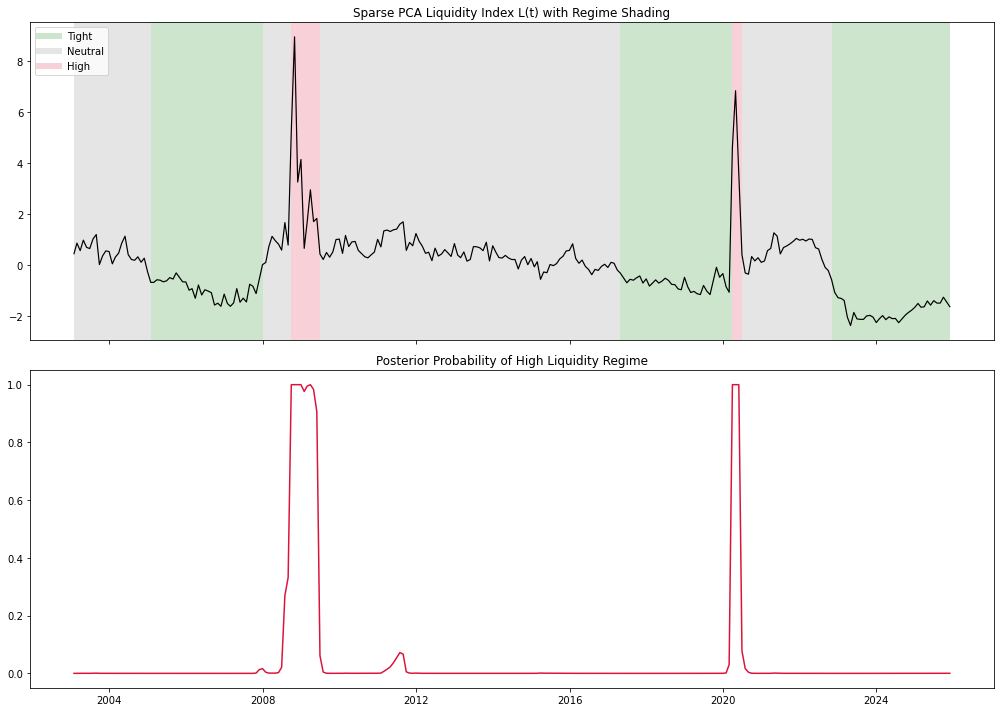

In [198]:
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# -----------------------------
# TOP PANEL — L(t) + shading
# -----------------------------
ax[0].plot(regimes_df.index, regimes_df["L"], color="black", lw=1.2)
ax[0].set_title("Sparse PCA Liquidity Index L(t) with Regime Shading")

# Define plain colors for each regime
regime_colors = {
    "Tight":   "green",
    "Neutral": "gray",
    "High":    "crimson",
}

shade_alpha = 0.2  # semi-opaque

for label, color in regime_colors.items():
    mask = regimes_df["state_label"] == label

    in_region = False
    start = None

    for i in range(len(mask)):
        if mask.iloc[i] and not in_region:
            in_region = True
            start = regimes_df.index[i]

        elif not mask.iloc[i] and in_region:
            in_region = False
            end = regimes_df.index[i]
            ax[0].axvspan(start, end, color=color, alpha=shade_alpha, linewidth=0)

    # If region extends to the end of the sample
    if in_region:
        ax[0].axvspan(start, regimes_df.index[-1], color=color, alpha=shade_alpha, linewidth=0)

# Legend for regimes (shaded colors)
from matplotlib.lines import Line2D
legend_patches = [
    Line2D([0], [0], color="green",   lw=6, alpha=shade_alpha, label="Tight"),
    Line2D([0], [0], color="gray",    lw=6, alpha=shade_alpha, label="Neutral"),
    Line2D([0], [0], color="crimson", lw=6, alpha=shade_alpha, label="High"),
]
ax[0].legend(handles=legend_patches, loc="upper left")

# -----------------------------
# BOTTOM PANEL — High regime probability
# -----------------------------
if "p_state_0" in regimes_df.columns:
    high_state_id = regimes_df.groupby("state_label")["state"].first()["High"]
    ax[1].plot(regimes_df.index,
               regimes_df[f"p_state_{high_state_id}"],
               color="crimson", lw=1.5)
    ax[1].set_title("Posterior Probability of High Liquidity Regime")

plt.tight_layout()
plt.show()


###  Equity Factor Data (Fama–French)

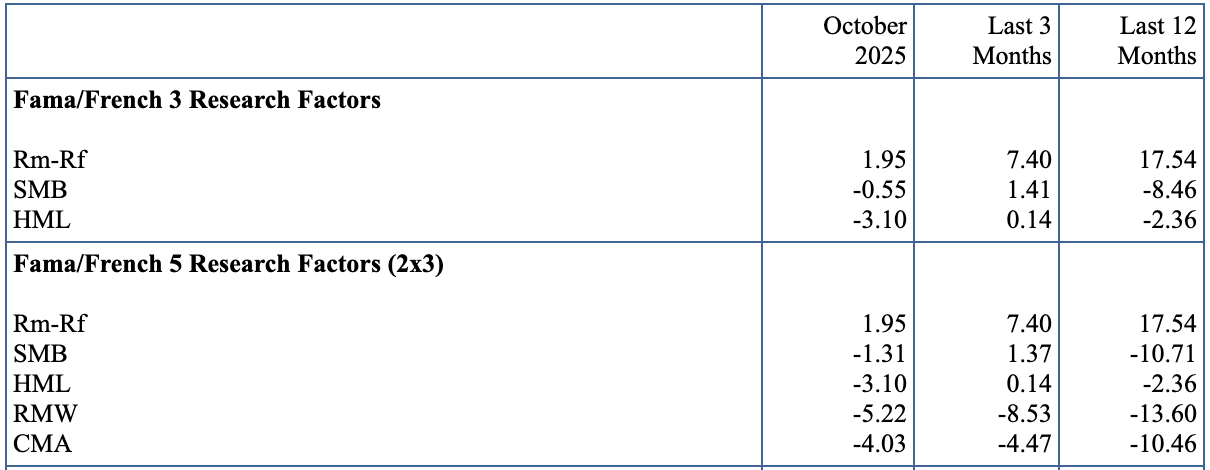

These five factors extend the original 3-factor model to better explain cross-sectional stock returns.

They are:

1. **Rm–Rf** — Market excess return
2. **SMB** — Size (Small Minus Big)
3. **HML** — Value (High Book/Market minus Low)
4. **RMW** — Profitability (Robust Minus Weak)
5. **CMA** — Investment (Conservative Minus Aggressive)

Let's break each down precisely.

---

#### **Rm – Rf: Market Excess Return**

$$
R_{m}-R_{f}
$$
The return of the **broad market** minus the **risk-free rate**.

* Positive → market went up more than cash.
* Negative → market underperformed cash/T-bills.

**In above table:**

* Last 12 months: **+17.54%** → very strong bull market year.
* Last 3 months: **+7.40%** → strong quarter.
* October 2025: **+1.95%** → moderate positive month.

---

#### **SMB: Size Factor (Small Minus Big)**

$$
\text{SMB} = R_{\text{small}} - R_{\text{big}}
$$

* Positive → small caps outperform large caps.
* Negative → large caps outperform small caps.

**In above table:**

* Last 12 months: **–10.71%** → a *massive* large-cap dominance year.
* This is consistent with mega-cap tech leadership.

---

#### **HML: Value Factor (High Minus Low Book-to-Market)**

$$
\text{HML} = R_{\text{value}} - R_{\text{growth}}
$$

* Positive → value outperforms growth.
* Negative → growth outperforms value.

**In above table:**

* Last 12 months: **–2.36%** → growth beat value.
* October 2025: **–3.10%** → especially growth-heavy month.

This aligns with liquidity-driven growth leadership.

---

#### **RMW: Profitability (Robust Minus Weak)**

$$
\text{RMW} = R_{\text{robust}} - R_{\text{weak}}
$$

Robust = high operating profitability.
Weak = low profitability.

* Positive → profitable companies outperform weak ones.
* Negative → weak/low-profit companies outperform.

**In above table:**

* Last 12 months: **–13.60%** → very unusual.
* This means **unprofitable firms outperformed** profitable ones over the year.

That usually happens in:

* early speculative bubbles
* liquidity-driven rallies
* retail-led tech/small-cap frenzies
* AI/futuristic narrative periods

---

#### **CMA: Investment Factor (Conservative Minus Aggressive)**

$$
\text{CMA} = R_{\text{conservative}} - R_{\text{aggressive}}
$$

* Conservative = firms investing slowly
* Aggressive = firms aggressively expanding assets

High investment → lower expected returns historically
(consistent with q-theory: empire-building destroys value).

* Positive → conservative firms outperform heavy spenders.
* Negative → aggressive investment firms outperform.

**In above table:**

* Last 12 months: **–10.46%**
* Last 3 months: **–4.47%**
* October 2025: **–4.03%**

Interpretation:
Aggressively investing companies — think AI, R&D, biotech, high-growth tech — massively outperformed low-investment firms.


| Factor       | Sign                                               | Interpretation |
| ------------ | -------------------------------------------------- | -------------- |
| **Rm–Rf: +** | Strong bull market                                 |                |
| **SMB: –**   | Mega-caps beat small caps massively                |                |
| **HML: –**   | Growth beat value                                  |                |
| **RMW: –**   | Low-profit firms beat profitable firms             |                |
| **CMA: –**   | Aggressive-investment firms beat conservative ones |                |

This is the **textbook signature of a liquidity-driven growth/tech momentum regime**, almost identical to:

* 1998–1999 Dotcom
* 2019–2021 QE wave
* 2023–2024 AI mega-cap boom

It means:

#### Investors preferred

* large
* growth
* unprofitable
* high-spending
* high-duration
  **tech/AI/future-theme stocks**

#### Fundamentals (profitability, valuation, conservative investment) were *penalized*

This is exactly the kind of environment where:

* Value fails
* Small cap fails
* Profitability fails
* Investment works negatively
* Growth dominates
* Mega-caps dominate


In [199]:
def download_ff_factors(start, end):
    """
    Download monthly Fama-French 5 factors (2x3) using pandas_datareader.
    """
    print("Downloading Fama-French factors (famafrench)...")
    ff_raw = pdr.DataReader(
        name=FF_FACTORS_DATASET,
        data_source="famafrench",
        start=start,
        end=end
    )[0]  # table [0] contains the data

    ff = (ff_raw
          .divide(100)  # convert from % to decimal
          .reset_index(names="date")
          .assign(date=lambda x: pd.to_datetime(x["date"].astype(str)))
          .rename(str.lower, axis="columns")
          .rename(columns={"mkt-rf": "mkt_excess"}))

    ff = ff.set_index("date")
    return ff

ff_factors = download_ff_factors(start_date, end_date)


<ipython-input-199-55f7e03990a5>:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_raw = pdr.DataReader(
<ipython-input-199-55f7e03990a5>:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_raw = pdr.DataReader(


In [201]:
ff_factors.tail()

,mkt_excess,smb,hml,rmw,cma,rf
date,,,,,,
2025-07-01,0.0198,-0.0015,-0.0127,-0.0029,-0.0207,0.0034
2025-08-01,0.0185,0.0488,0.0442,-0.0067,0.0208,0.0038
2025-09-01,0.0339,-0.0218,-0.0105,-0.0203,-0.0222,0.0033
2025-10-01,0.0196,-0.0131,-0.0309,-0.0522,-0.0403,0.0037
2025-11-01,-0.0013,0.0147,0.0376,0.0143,0.0068,0.0030


#### Fix Fama–French dates (shift one month backward) to align with `regimes_df`

In [355]:
# Fix Fama–French dates (shift one month backward)
ff_adj = ff_factors.copy()

### Actual Fama-French Convention:
#
# Label          Contains Returns FOR
# 2020-03-01  →  March 2020 (Mar 1 - Mar 31)
# 2020-04-01  →  April 2020 (Apr 1 - Apr 30)
# 2020-05-01  →  May 2020 (May 1 - May 31)
ff_adj.index = ff_adj.index.to_period("M").to_timestamp("M")

ff_adj.tail()

,mkt_excess,smb,hml,rmw,cma,rf
date,,,,,,
2025-07-31,0.0198,-0.0015,-0.0127,-0.0029,-0.0207,0.0034
2025-08-31,0.0185,0.0488,0.0442,-0.0067,0.0208,0.0038
2025-09-30,0.0339,-0.0218,-0.0105,-0.0203,-0.0222,0.0033
2025-10-31,0.0196,-0.0131,-0.0309,-0.0522,-0.0403,0.0037
2025-11-30,-0.0013,0.0147,0.0376,0.0143,0.0068,0.0030


#### Join regimes_df with Fama–French factors

In [356]:
# Ensure regimes are month-end
reg = regimes_df.copy()
reg.index = reg.index.to_period("M").to_timestamp("M")

# Join on month-end date
combined = reg.join(ff_adj, how="inner")

In [357]:
combined.tail()

,L,state,p_state_0,p_state_1,p_state_2,state_label,mkt_excess,smb,hml,rmw,cma,rf
2025-06-30,-1.384971,2,1.763643e-10,3.461616e-08,1.000000,Tight,0.0486,-0.0002,-0.0161,-0.0320,0.0144,0.0034
2025-07-31,-1.481025,2,4.213931e-09,1.477532e-08,1.000000,Tight,0.0198,-0.0015,-0.0127,-0.0029,-0.0207,0.0034
2025-08-31,-1.480004,2,1.745053e-07,1.492070e-08,1.000000,Tight,0.0185,0.0488,0.0442,-0.0067,0.0208,0.0038
2025-09-30,-1.248705,2,7.336618e-06,1.134537e-07,0.999993,Tight,0.0339,-0.0218,-0.0105,-0.0203,-0.0222,0.0033
2025-11-30,-1.620391,2,2.921088e-04,2.068795e-07,0.999708,Tight,-0.0013,0.0147,0.0376,0.0143,0.0068,0.0030


### Factor returns by liquidity regime

In [164]:
def calculate_factor_statistics_by_regime_accurate(df, factor_cols, regime_col='state_label_lag1', 
                                                   regime_order=['High', 'Neutral', 'Tight']):
    """
    Calculate comprehensive factor statistics by regime with accurate annualization.
    
    Uses geometric compounding for returns and proper volatility scaling.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame with monthly factor returns and regime labels
    factor_cols : list
        List of factor column names
    regime_col : str
        Column name for regime labels
    regime_order : list
        Order of regimes for display
    
    Returns:
    --------
    pd.DataFrame with all statistics
    """
    
    # Calculate statistics by regime
    stats = {}
    
    for regime in regime_order:
        if regime not in df[regime_col].unique():
            continue
            
        regime_data = df[df[regime_col] == regime][factor_cols]
        
        stats[regime] = {
            'mean': regime_data.mean(),
            'std': regime_data.std(),
            'sharpe': regime_data.mean() / regime_data.std(),
            'n_months': len(regime_data),
            'data': regime_data  # Store for geometric calculation
        }
    
    # Build results dataframe
    results = []
    
    for factor in factor_cols:
        row = {'Factor': factor.upper()}
        
        for regime in regime_order:
            if regime in stats:
                # Monthly statistics (as percentages)
                monthly_mean = stats[regime]['mean'][factor]
                monthly_std = stats[regime]['std'][factor]
                monthly_sharpe = stats[regime]['sharpe'][factor]
                
                row[f'{regime}_mean'] = monthly_mean * 100
                row[f'{regime}_std'] = monthly_std * 100
                row[f'{regime}_sharpe'] = monthly_sharpe
                
                # ACCURATE ANNUALIZATION
                
                # 1. Annualized return using geometric compounding
                # Formula: (1 + r_m)^12 - 1
                ann_return = (1 + monthly_mean)**12 - 1
                
                # 2. Annualized volatility
                # Under IID assumption: σ_annual = σ_monthly * sqrt(12)
                ann_std = monthly_std * np.sqrt(12)
                
                # 3. Annualized Sharpe ratio (two methods - should be equivalent)
                # Method 1: Scale monthly Sharpe by sqrt(12)
                ann_sharpe_method1 = monthly_sharpe * np.sqrt(12)
                
                # Method 2: Direct calculation from annualized values
                ann_sharpe_method2 = ann_return / ann_std if ann_std > 0 else np.nan
                
                # Store annualized values
                row[f'{regime}_mean_ann'] = ann_return * 100
                row[f'{regime}_std_ann'] = ann_std * 100
                row[f'{regime}_sharpe_ann'] = ann_sharpe_method1  # Using standard method
                
                # Optional: Store geometric return for verification
                # This calculates actual cumulative return over the period
                actual_returns = stats[regime]['data'][factor].values
                cumulative_return = np.prod(1 + actual_returns) - 1
                n_years = len(actual_returns) / 12
                if n_years > 0:
                    geometric_annual = (1 + cumulative_return)**(1/n_years) - 1
                    row[f'{regime}_geom_ann'] = geometric_annual * 100
        
        results.append(row)
    
    return pd.DataFrame(results)


def print_formatted_table_accurate(stats_df, regime_order=['High', 'Tight'], show_geometric=False):
    """
    Print a beautifully formatted table with accurate annualization.
    """
    
    print("\n" + "="*90)
    print("FACTOR RETURNS BY REGIME (Monthly)")
    print("="*90)
    
    # Header
    print(f"{'':6}", end='')
    print(f"{'Mean Return':>24}  {'Std Dev':>24}  {'Sharpe Ratio':>24}")
    
    print(f"{'Factor':6}", end='')
    for regime in regime_order:
        print(f"{regime:>11} ", end='')
    print(" ", end='')
    for regime in regime_order:
        print(f"{regime:>11} ", end='')
    print(" ", end='')
    for regime in regime_order:
        print(f"{regime:>11} ", end='')
    print()
    
    print("-"*90)
    
    # Data rows
    for _, row in stats_df.iterrows():
        factor = row['Factor']
        print(f"{factor:6}", end='')
        
        # Mean returns
        for regime in regime_order:
            val = row[f'{regime}_mean']
            print(f"{val:10.2f}% ", end='')
        print(" ", end='')
        
        # Std dev
        for regime in regime_order:
            val = row[f'{regime}_std']
            print(f"{val:10.2f}% ", end='')
        print(" ", end='')
        
        # Sharpe
        for regime in regime_order:
            val = row[f'{regime}_sharpe']
            print(f"{val:11.3f} ", end='')
        print()
    
    # Annualized section
    print()
    print("Annualized (geometric compounding: (1+r_m)^12-1; volatility: σ_m*√12)")
    print("-"*90)
    
    for _, row in stats_df.iterrows():
        factor = row['Factor']
        print(f"{factor:6}", end='')
        
        # Annualized mean returns
        for regime in regime_order:
            val = row[f'{regime}_mean_ann']
            print(f"{val:10.1f}% ", end='')
        print(" ", end='')
        
        # Annualized std dev
        for regime in regime_order:
            val = row[f'{regime}_std_ann']
            print(f"{val:10.1f}% ", end='')
        print(" ", end='')
        
        # Annualized Sharpe
        for regime in regime_order:
            val = row[f'{regime}_sharpe_ann']
            print(f"{val:11.3f} ", end='')
        print()
    
    # Optional: Show geometric returns based on actual cumulative performance
    if show_geometric:
        print()
        print("Geometric Annual Returns (from actual cumulative performance)")
        print("-"*90)
        
        for _, row in stats_df.iterrows():
            factor = row['Factor']
            print(f"{factor:6}", end='')
            
            for regime in regime_order:
                if f'{regime}_geom_ann' in row:
                    val = row[f'{regime}_geom_ann']
                    print(f"{val:10.1f}% ", end='')
                else:
                    print(f"{'N/A':>11} ", end='')
            print()
    
    print("="*90 + "\n")

In [267]:
df2 = combined.copy()

# Regime at t (end-of-month) predicting factor returns at t+1
df2["state_label_lag1"] = df2["state_label"].shift(1)

# Drop first row (no lag)
df2 = df2.dropna(subset=["state_label_lag1", "mkt_excess", "hml", "rmw", "cma"])

# Define factors
factor_cols = ['mkt_excess', 'hml', 'rmw', 'cma']

# Calculate statistics with ACCURATE annualization
stats_df = calculate_factor_statistics_by_regime_accurate(
    df2, 
    factor_cols, 
    regime_col='state_label_lag1',
    regime_order=['High', 'Neutral', 'Tight']
)

# Print formatted table (like your image but with accurate formulas)
print_formatted_table_accurate(stats_df, regime_order=['High', 'Tight'], show_geometric=True)


FACTOR RETURNS BY REGIME (Monthly)
                   Mean Return                   Std Dev              Sharpe Ratio
Factor       High       Tight         High       Tight         High       Tight 
------------------------------------------------------------------------------------------
MKT_EXCESS      1.85%       0.74%        6.96%       4.00%        0.266       0.185 
HML        -1.75%      -0.53%        4.97%       2.94%       -0.352      -0.179 
RMW         0.29%       0.03%        1.76%       1.58%        0.164       0.019 
CMA        -0.28%      -0.35%        1.86%       1.79%       -0.150      -0.197 

Annualized (geometric compounding: (1+r_m)^12-1; volatility: σ_m*√12)
------------------------------------------------------------------------------------------
MKT_EXCESS      24.6%        9.3%        24.1%       13.9%        0.921       0.642 
HML        -19.1%       -6.1%        17.2%       10.2%       -1.220      -0.620 
RMW          3.5%        0.4%         6.1%        5.5

### What's going on ?

This is reverse of what you'd expect. In a tight liquidity regime, $R^{smb}$ and $R^{hml}$ should be deeply positive. You'd expect small under-valued companies to outperform big companies with premium valuation.

Let's go back to the $L_t$ and understand what's going on

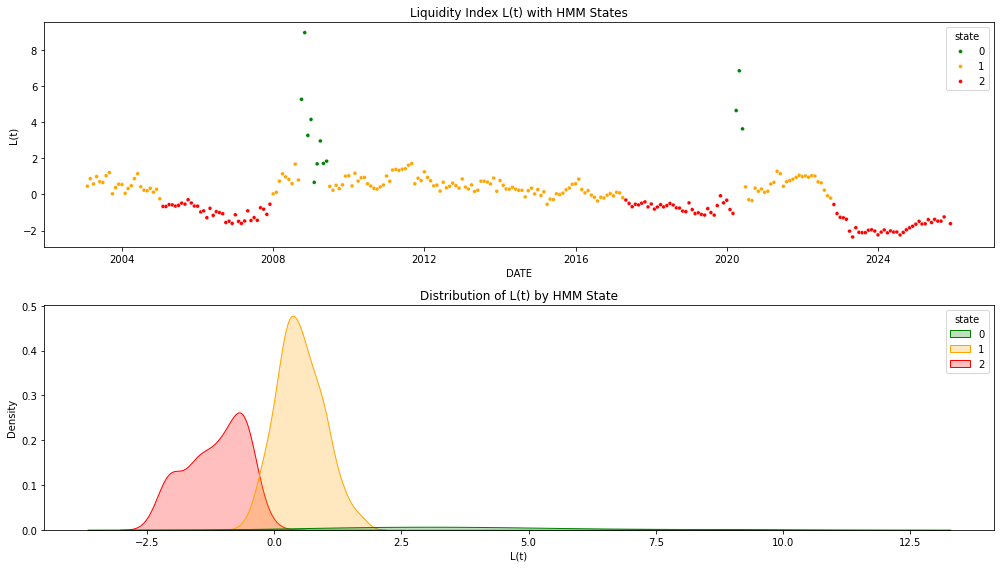

In [335]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=False)

# 1: Time series with regimes
sns.scatterplot(
    x=L_t.index,
    y=L_t.values,
    hue=regimes_df["state"],
    palette={0: "green", 1: "orange", 2: "red"},
    ax=ax[0],
    s=15
)
ax[0].set_title("Liquidity Index L(t) with HMM States")
ax[0].set_ylabel("L(t)")

# 2: KDE (distribution) by state
sns.kdeplot(
    data=regimes_df,
    x="L",
    hue="state",
    fill=True,
    palette={0: "green", 1: "orange", 2: "red"},
    ax=ax[1]
)
ax[1].set_title("Distribution of L(t) by HMM State")
ax[1].set_xlabel("L(t)")

plt.tight_layout()
plt.show()


In [94]:
means = pd.Series(model.means_.flatten(), index=range(n_states))
var_covar = pd.Series(model._covars_.flatten(), index=range(n_states))

model_df = pd.DataFrame({'means': means, 'var': var_covar})
model_df

,means,var
0,2.689160,3.067263
1,0.378674,0.112808
2,-0.860576,0.190807


From the KDE (bottom panel):

- States 2 (red) and 1 (yellow) heavily overlap
- Only state 0 (green) is clearly separated — the “high liquidity spike”
- This corresponds to crisis/QE events (2008, 2020), where liquidity jumps dramatically

So the natural clustering is:

- One large cluster (normal-tight-neutral combined)
- One **rare extreme spike cluster**

My HMM is being forced to split the unimodal bulk distribution into two states, resulting in:


```python
means = pd.Series(model.means_.flatten(), index=range(n_states))
means

0   -0.159797
1   -0.105787
2    2.717670
dtype: float64
```

I initially thought alpha=0.5 in SparsePCA might be the cause.
But the plot shows:

- L(t) has a healthy dynamic range across time (≈ −2.5 to +12)
- The high liquidity cluster is clear and **RARE**
- The rest of L(t) is genuinely one blob

If Sparse PCA was “overshrinking,” L(t) would be compressed; but it is not.

### Question is why high liquidity is rare (look at the KDE of gree state 0) ?

- Is Liquidity is fundamentally spiky ?
- Why ?
- Am I defining Liquidity incorrectly ?

Fed/Treasury continuously debased currency throughout 2008-2019 period. Liquidity injection (bailing out banks during GFC/2008, ZIRP era, M2 stimulius of 2019 are visible ones). How would I capture this events as proxy of "liquidity" ?

<hr>

> Right now your $L_t$ is basically a **short-horizon “flow” liquidity shock index**.

> Whereas I'm looking for slow, structural debasement / regime of easy money (2008–2019, QE, ZIRP, etc.).

> Those are not the same object.



Because I use 1-month growth rates $\Delta \log(\cdot)$, my index reacts to spikes / changes, not the level of the monetary stock.

I need to factor in more factors to the liquidity index such as -

- **Level of money / balance sheet relative to trend** / GDP, not just monthly change
- **Prolonged ZIRP** / negative real rate period
- **Excess liquidity** over economic activity


#### Liquidity Vector Augmentation: Two-layer liquidity: Flow vs Stock / Excess

#### Add level / excess variables

Examples (all can be pulled from FRED):

**Log level vs pre-2008 trend**

Let $m_t = \log M2_t$. Fit a linear trend on a pre-QE baseline (say 1985–2007):

$m_t \approx a + bt \quad (t \le 2007)$

Then define excess money stock:

$EM_t = m_t - (a + bt)$

After 2008, $EM_t$ becomes increasingly positive if M2 grows above its historical trend.

Similarly for the Fed Balance Sheet, let $b_t = \log(\text{FedBal}_t)$:

$EB_t = b_t - (\alpha + \beta t)$  (pre-2007 trend)

---

**Excess liquidity versus real economy**

Use real GDP series (e.g., GDPC1) and define:

$EL_t = \log M2_t - \log GDP_t$

Or measure multi-year excess growth:

$EL_t(3y) = \log M2_t - \log M2_{t-36} - (\log GDP_t - \log GDP_{t-36})$

---

**ZIRP / negative real-rate indicator**

$D_t^{ZIRP} = 1(r_t^{real} < 0)$

From 2009–2015, this should be mostly 1.

---

#### Build an augmented feature vector

Instead of only:

$x_t = \{ \Delta \log M2_t,\; \Delta \log FedBal_t,\; TS_t,\; r_t^{real},\; CS_t \}$

Let's expand to:

$x_t^{aug} = \{ 
\Delta \log M2_t,\;
\Delta \log FedBal_t,\;
TS_t,\;
r_t^{real},\;
CS_t,\;
EM_t,\;
EB_t,\;
EL_t,\;
EL_t(3y),\;
D_t^{ZIRP}
\}$

Then standardize and perform PCA / SparsePCA on this.


- **PC1** (or a combination) loading heavily on $EM$, $EB$, $EL$, $D_t^{ZIRP}$ → structural easy-money regime  
- **PC2** (or your current PC1) loading on short-horizon changes → flow / shock liquidity


In [208]:
macro_raw.tail()

,M2SL,FED_BAL,TB3M,DGS10,BAA,AAA,CPI,GDP
DATE,,,,,,,,
2025-08-31,22108.3,6603384.0,4.12,4.23,6.00,5.35,323.364,30485.729
2025-09-30,22212.4,6608395.0,3.92,4.16,5.83,5.21,324.368,31095.089
2025-10-31,22298.0,6587034.0,3.82,4.11,5.74,5.13,NaN,NaN
2025-11-30,22322.4,6552419.0,3.78,4.02,5.86,5.26,325.031,NaN
2025-12-31,NaN,6640618.0,3.59,4.18,5.90,5.31,326.030,NaN


In [210]:
# 1. Start from the original GDP values only (drop NaNs)
gdp_series = macro_raw["GDP"].dropna()

# 2. Collapse to unique quarter-end values
#    - If GDP is timestamped at quarter *start* (e.g. 2025-04-01),
#      this will move it to the quarter end (2025-06-30) and give unique labels.
gdp_q = gdp_series.resample("Q").last()   # quarterly, at quarter-end (e.g. 2025-03-31, 2025-06-30, ...)

# 3. Downsample to monthly and forward-fill within the quarter
gdp_m = gdp_q.resample("M").ffill()

# 4. Assign back into macro_raw, aligning on the monthly index
macro_raw["GDP"] = gdp_m

macro_raw.tail()

,M2SL,FED_BAL,TB3M,DGS10,BAA,AAA,CPI,GDP
DATE,,,,,,,,
2025-08-31,22108.3,6603384.0,4.12,4.23,6.00,5.35,323.364,30485.729
2025-09-30,22212.4,6608395.0,3.92,4.16,5.83,5.21,324.368,31095.089
2025-10-31,22298.0,6587034.0,3.82,4.11,5.74,5.13,NaN,NaN
2025-11-30,22322.4,6552419.0,3.78,4.02,5.86,5.26,325.031,NaN
2025-12-31,NaN,6640618.0,3.59,4.18,5.90,5.31,326.030,NaN


In [244]:
def build_liquidity_proxies_augmented(macro_df: pd.DataFrame) -> pd.DataFrame:
    df = macro_df.copy()

    # 1. Flow proxies
    df["dlog_M2"]       = np.log(df["M2SL"]).diff()
    df["dlog_FED_BAL"]  = np.log(df["FED_BAL"]).diff()
    df["term_spread"]   = df["DGS10"] - df["TB3M"]
    df["infl_yoy"]      = np.log(df["CPI"]).diff(12)
    df["real_rate"]     = df["TB3M"] - 100 * df["infl_yoy"]
    df["credit_spread"] = df["BAA"] - df["AAA"]

    # 2. Levels
    df["log_M2"]      = np.log(df["M2SL"])
    df["log_FED_BAL"] = np.log(df["FED_BAL"])

    # Use data up to 2007-12-31 to fit trends
    pre = df.loc[: "2007-12-31"].copy()

    # --- Trend for M2 ---
    pre_m2 = pre["log_M2"].dropna()
    t_m2   = np.arange(len(pre_m2))
    coefs_M2 = np.polyfit(t_m2, pre_m2.values, deg=1)

    t_full = np.arange(len(df))
    trend_M2 = np.polyval(coefs_M2, t_full)
    df["EM"] = df["log_M2"] - trend_M2

    # --- Trend for Fed balance sheet ---
    pre_fb = pre["log_FED_BAL"].dropna()
    t_fb   = np.arange(len(pre_fb))
    coefs_FB = np.polyfit(t_fb, pre_fb.values, deg=1)

    trend_FB = np.polyval(coefs_FB, t_full)
    df["EB"] = df["log_FED_BAL"] - trend_FB

    # 3. Excess liquidity vs GDP over 3y
    df["log_GDP"] = np.log(df["GDP"])
    df["EL_3y"] = (df["log_M2"] - df["log_M2"].shift(36)) - \
                  (df["log_GDP"] - df["log_GDP"].shift(36))

    # 4. ZIRP dummy
    df["ZIRP_dummy"] = (df["real_rate"] < 0).astype(int)

    # 5. Build augmented proxy matrix
    cols_aug = [
        "dlog_M2", "dlog_FED_BAL", "term_spread", "real_rate", "credit_spread",
        "EM", "EB", "EL_3y", "ZIRP_dummy"
    ]

    return df[cols_aug].dropna()


liquidity_proxies_aug = build_liquidity_proxies_augmented(macro_raw)

In [245]:
liquidity_proxies_aug.tail()

,dlog_M2,dlog_FED_BAL,term_spread,real_rate,credit_spread,EM,EB,EL_3y,ZIRP_dummy
DATE,,,,,,,,,
2025-05-31,0.002610,-0.005385,0.16,1.901852,0.75,0.196762,0.724600,-0.167473,0
2025-06-30,0.005255,-0.001656,0.01,1.592409,0.69,0.197696,0.719428,-0.150763,0
2025-07-31,0.003921,-0.002950,0.12,1.554846,0.65,0.197296,0.712962,-0.146787,0
2025-08-31,0.003607,-0.005918,0.11,1.223147,0.65,0.196583,0.703528,-0.141566,0
2025-09-30,0.004698,0.000759,0.24,0.942084,0.62,0.196960,0.700771,-0.134480,0


In [336]:
z1_t = standardize_and_signflip(liquidity_proxies_aug)
L1_t = build_sparse_pca_liquidity_index(z1_t, alpha=0.5)

SparsePCA components (loadings):
  dlog_M2: +0.135
  dlog_FED_BAL: +0.166
  term_spread: +0.406
  real_rate: +0.508
  credit_spread: -0.067
  EM: +0.077
  EB: +0.101
  EL_3y: +0.518
  ZIRP_dummy: +0.491

Top 3 variables by absolute loading:
  EL_3y: loading=+0.518, corr=+0.886, weighted=+0.460
  real_rate: loading=+0.508, corr=+0.870, weighted=+0.442
  ZIRP_dummy: loading=+0.491, corr=+0.841, weighted=+0.413

Weighted average correlation: +0.866
✅ Sign correct: L_t weighted correlation positive


In [337]:
n_states=2
model, regimes_aug_df = fit_hmm_on_liquidity(L1_t,n_states=n_states)

HMM state means (unsorted, in fitted scale):
  state 0: mean L = 0.501
  state 1: mean L = -1.516


#### Retrospective Validation

In [312]:
summary_aug = calculate_regime_summary(regimes_aug_df, L1_t)
print(summary_aug)

  Regime  Mean L(t)   Std Dev  Months    Percent
0   High   0.859600  0.900571     205  75.091575
1  Tight  -2.591442  0.597277      68  24.908425


In [358]:
# Ensure regimes are month-end
reg = regimes_aug_df.copy()
reg.index = reg.index.to_period("M").to_timestamp("M")

# Join on month-end date
combined_aug = reg.join(ff_adj, how="inner")

#### Current combined_aug structure check

In [359]:
print("="*80)
print("DETAILED DATE ALIGNMENT CHECK: COVID Period (Feb-May 2020)")
print("="*80)

# Show window around COVID crash
covid_window = ['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31']

print("\n" + "-"*80)
print("Date         | MKT_EXCESS | HML    | Regime      | What Should This Be?")
print("-"*80)

for date in covid_window:
    if date in combined_aug.index:
        row = combined_aug.loc[date]
        mkt = row['mkt_excess'] * 100
        hml = row['hml'] * 100
        regime = row.get('regime_3state', row.get('state_label', 'Unknown'))
        
        # Expected values
        expected = {
            '2020-01-31': ('Jan: Normal',          -0.16),
            '2020-02-29': ('Feb: Start of fear',   -8.23),
            '2020-03-31': ('Mar: CRASH',          -12.35),
            '2020-04-30': ('Apr: Recovery',       +12.68),
            '2020-05-31': ('May: Continued rally', +4.53),
        }
        
        exp_desc, exp_ret = expected.get(date, ('Unknown', 0))
        
        # Check if close to expected
        status = "✅" if abs(mkt - exp_ret) < 2.0 else "❌"
        
        print(f"{date}   | {mkt:+7.2f}%  | {hml:+6.2f}% | {regime:11s} | {status} {exp_desc} (exp: {exp_ret:+.2f}%)")
    else:
        print(f"{date} | NOT FOUND IN INDEX")

print("-"*80)

DETAILED DATE ALIGNMENT CHECK: COVID Period (Feb-May 2020)

--------------------------------------------------------------------------------
Date         | MKT_EXCESS | HML    | Regime      | What Should This Be?
--------------------------------------------------------------------------------
2020-01-31   |   -0.09%  |  -6.22% | High        | ✅ Jan: Normal (exp: -0.16%)
2020-02-29   |   -8.15%  |  -3.82% | High        | ✅ Feb: Start of fear (exp: -8.23%)
2020-03-31   |  -13.35%  | -13.83% | High        | ✅ Mar: CRASH (exp: -12.35%)
2020-04-30   |  +13.58%  |  -1.34% | High        | ✅ Apr: Recovery (exp: +12.68%)
2020-05-31   |   +5.59%  |  -5.00% | High        | ✅ May: Continued rally (exp: +4.53%)
--------------------------------------------------------------------------------


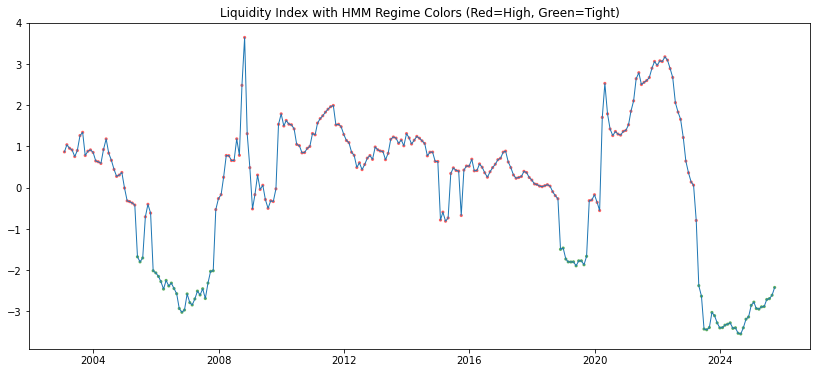

In [360]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(combined_aug.index, combined_aug['L'], label='L(t)', linewidth=1)

# Color by regime
colors = combined_aug['state_label'].map({'High': 'red', 'Tight': 'green'})
ax.scatter(combined_aug.index, combined_aug['L'], c=colors, s=5, alpha=0.5)

ax.set_title('Liquidity Index with HMM Regime Colors (Red=High, Green=Tight)')
plt.show()

In [361]:
# Check factor performance in specific periods we KNOW the regime
known_periods = {
    '2010-2014 (QE era)': ('2010-01', '2014-12'),
    '2015-2019 (Late cycle)': ('2015-01', '2019-12'), 
    '2020-2021 (COVID QE)': ('2020-01', '2021-12'),
    '2022-2024 (QT/hiking)': ('2022-01', '2024-12')
}

for label, (start, end) in known_periods.items():
    period_data = combined_aug.loc[start:end]
    print(f"\n{label}:")
    print(f"  Mean L: {period_data['L'].mean():.2f}")
    print(f"  Dominant regime: {period_data['state_label'].mode()[0]}")
    print(f"  HML: {period_data['hml'].mean():.4f}")
    print(f"  SMB: {period_data['smb'].mean():.4f}")


2010-2014 (QE era):
  Mean L: 1.13
  Dominant regime: High
  HML: -0.0005
  SMB: 0.0012

2015-2019 (Late cycle):
  Mean L: -0.15
  Dominant regime: High
  HML: -0.0034
  SMB: -0.0018

2020-2021 (COVID QE):
  Mean L: 1.86
  Dominant regime: High
  HML: -0.0056
  SMB: 0.0023

2022-2024 (QT/hiking):
  Mean L: -1.19
  Dominant regime: Tight
  HML: 0.0033
  SMB: -0.0041


In [362]:
# Define factors
factors = ['mkt_excess', 'hml', 'rmw', 'cma']
df3 = combined_aug.copy()

# Regime at t (end-of-month) predicting factor returns at t+1
df3["state_label_lag1"] = df3["state_label"].shift(-1)

# Calculate statistics with ACCURATE annualization
stats_df_aug = calculate_factor_statistics_by_regime_accurate(
    df3, 
    factor_cols, 
    regime_col='state_label_lag1',
    regime_order=['High', 'Neutral', 'Tight']
)

# Print formatted table (like your image but with accurate formulas)
print_formatted_table_accurate(stats_df_aug, regime_order=['High', 'Tight'], show_geometric=True)


FACTOR RETURNS BY REGIME (Monthly)
                   Mean Return                   Std Dev              Sharpe Ratio
Factor       High       Tight         High       Tight         High       Tight 
------------------------------------------------------------------------------------------
MKT_EXCESS      0.88%       0.89%        4.54%       3.69%        0.193       0.240 
HML         0.06%      -0.29%        3.20%       2.74%        0.018      -0.106 
RMW         0.28%       0.18%        2.08%       1.51%        0.135       0.118 
CMA         0.15%      -0.31%        1.93%       1.73%        0.079      -0.181 

Annualized (geometric compounding: (1+r_m)^12-1; volatility: σ_m*√12)
------------------------------------------------------------------------------------------
MKT_EXCESS      11.1%       11.2%        15.7%       12.8%        0.670       0.831 
HML          0.7%       -3.4%        11.1%        9.5%        0.063      -0.366 
RMW          3.4%        2.2%         7.2%        5.2

#### Root Cause: Crisis Contamination

The problem is 2008-2009 and 2020 dominate my "High" regime but have CRISIS-driven factor dynamics, not QE-driven dynamic

liquidity index is working perfectly - it correctly identifies:

2008-2009: Massive liquidity injection (L spikes)
2022-2024: Liquidity withdrawal (L crashes)

BUT during structural shocks (financial crisis, pandemic):

- Normal factor relationships break down
- Flight to quality dominates
- Value/defensive assets outperform despite high liquidity

In [363]:
print("2010-2014 QE era:")
qe_period = combined_3regime.loc['2010-01':'2014-12']
print(f"  Mean L: {qe_period['L'].mean():.2f}")
print(f"  Regime mode: {qe_period['regime_3state'].mode()[0]}")
print(f"  HML: {qe_period['hml'].mean()*100:.2f} bps")
print(f"  Mean MKT: {qe_period['mkt_excess'].mean()*100:.2f} bps")

print("\n2022-2024 QT era:")
qt_period = combined_3regime.loc['2022-01':'2024-12']
print(f"  Mean L: {qt_period['L'].mean():.2f}")
print(f"  Regime mode: {qt_period['regime_3state'].mode()[0]}")
print(f"  HML: {qt_period['hml'].mean()*100:.2f} bps")
print(f"  Mean MKT: {qt_period['mkt_excess'].mean()*100:.2f} bps")

print("\n2008-09 Crisis:")
crisis_period = combined_3regime.loc['2008-09':'2009-03']
print(f"  Mean L: {crisis_period['L'].mean():.2f}")
print(f"  Regime mode: {crisis_period['regime_3state'].mode()[0]}")
print(f"  HML: {crisis_period['hml'].mean()*100:.2f} bps")
print(f"  Mean MKT: {crisis_period['mkt_excess'].mean()*100:.2f} bps")

2010-2014 QE era:
  Mean L: 1.13
  Regime mode: High
  HML: -0.12 bps
  Mean MKT: 1.30 bps

2022-2024 QT era:
  Mean L: -1.19
  Regime mode: Tight
  HML: 0.02 bps
  Mean MKT: 0.73 bps

2008-09 Crisis:
  Mean L: 1.08
  Regime mode: Crisis
  HML: -2.40 bps
  Mean MKT: -3.17 bps


In [364]:
def analyze_factor_returns_by_regime(combined_aug):
    """
    Analyze factor returns DURING each regime (contemporaneous).
    For crisis identification, use date-based approach.
    """
    df = combined_aug.copy()
    
    # ==========================================
    # STEP 1: Classify regimes (no lag!)
    # ==========================================
    # Date-based crisis periods
    crisis_dates = (
        ((df.index >= '2008-09') & (df.index <= '2009-03')) |
        ((df.index >= '2020-02') & (df.index <= '2020-04'))
    )
    
    # Liquidity-based classification
    df['regime_3state'] = 'Tight'
    df.loc[df['L'] > 0, 'regime_3state'] = 'High'
    df.loc[crisis_dates, 'regime_3state'] = 'Crisis'
    
    print("Regime distribution:")
    print(df['regime_3state'].value_counts())
    print()
    
    # ==========================================
    # STEP 2: Returns DURING each regime
    # ==========================================
    factors = ['mkt_excess', 'hml', 'rmw', 'cma']
    
    # Monthly returns
    returns_monthly = df.groupby('regime_3state')[factors].agg(['mean', 'std'])
    returns_monthly = returns_monthly * 100  # Convert to percentage
    
    print("="*80)
    print("FACTOR RETURNS DURING EACH REGIME (Monthly %)")
    print("="*80)
    
    for factor in factors:
        print(f"\n{factor.upper()}:")
        for regime in ['Crisis', 'High', 'Tight']:
            if regime in returns_monthly.index:
                mean = returns_monthly.loc[regime, (factor, 'mean')]
                std = returns_monthly.loc[regime, (factor, 'std')]
                sharpe = mean / std if std > 0 else 0
                n_months = (df['regime_3state'] == regime).sum()
                print(f"  {regime:8s}: {mean:+6.2f}% ± {std:5.2f}%  (Sharpe: {sharpe:+.3f}, N={n_months} months)")
    
    # ==========================================
    # STEP 3: Annualized returns
    # ==========================================
    print("\n" + "="*80)
    print("ANNUALIZED RETURNS (Geometric)")
    print("="*80)
    
    for factor in factors:
        print(f"\n{factor.upper()}:")
        for regime in ['Crisis', 'High', 'Tight']:
            if regime in df['regime_3state'].unique():
                regime_data = df[df['regime_3state'] == regime][factor]
                
                # Geometric return: (1+r1)*(1+r2)*...*(1+rN) then annualize
                cumulative = (1 + regime_data).prod()
                n_months = len(regime_data)
                
                if n_months > 0:
                    # Annualize: raise to power of (12/n_months)
                    annual_return = (cumulative ** (12 / n_months) - 1) * 100
                    print(f"  {regime:8s}: {annual_return:+6.2f}%")
    
    return df

combined_3regime = analyze_factor_returns_by_regime(combined_aug)
combined_3regime

Regime distribution:
regime_3state
High      167
Tight      98
Crisis      8
Name: count, dtype: int64

FACTOR RETURNS DURING EACH REGIME (Monthly %)

MKT_EXCESS:
  Crisis  :  -9.03% ±  5.43%  (Sharpe: -1.662, N=8 months)
  High    :  +1.33% ±  4.09%  (Sharpe: +0.324, N=167 months)
  Tight   :  +0.95% ±  3.66%  (Sharpe: +0.261, N=98 months)

HML:
  Crisis  :  -4.71% ±  6.18%  (Sharpe: -0.761, N=8 months)
  High    :  +0.25% ±  2.82%  (Sharpe: +0.088, N=167 months)
  Tight   :  -0.13% ±  2.90%  (Sharpe: -0.045, N=98 months)

RMW:
  Crisis  :  +0.97% ±  2.17%  (Sharpe: +0.449, N=8 months)
  High    :  +0.24% ±  2.15%  (Sharpe: +0.110, N=167 months)
  Tight   :  +0.20% ±  1.53%  (Sharpe: +0.131, N=98 months)

CMA:
  Crisis  :  +0.10% ±  1.78%  (Sharpe: +0.058, N=8 months)
  High    :  +0.19% ±  1.99%  (Sharpe: +0.093, N=167 months)
  Tight   :  -0.25% ±  1.68%  (Sharpe: -0.149, N=98 months)

ANNUALIZED RETURNS (Geometric)

MKT_EXCESS:
  Crisis  : -68.47%
  High    : +16.00%
  Tight   : +1

,L,state,p_state_0,p_state_1,state_label,mkt_excess,smb,hml,rmw,cma,rf,regime_3state
2003-01-31,0.869090,0,1.000000e+00,6.190372e-63,High,-0.0257,0.0071,-0.0079,-0.0093,0.0069,0.0010,High
2003-02-28,1.041793,0,1.000000e+00,1.286573e-11,High,-0.0188,-0.0087,-0.0136,0.0079,-0.0068,0.0009,High
2003-03-31,0.957294,0,1.000000e+00,2.965294e-11,High,0.0109,0.0077,-0.0211,0.0168,-0.0081,0.0010,High
2003-04-30,0.917277,0,1.000000e+00,4.386328e-11,High,0.0818,0.0114,0.0122,-0.0468,0.0098,0.0010,High
2003-05-31,0.756118,0,1.000000e+00,2.069103e-10,High,0.0605,0.0478,0.0070,-0.0694,0.0307,0.0009,High
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-31,-2.880509,1,1.340116e-07,9.999999e-01,Tight,0.0606,-0.0072,-0.0288,0.0129,0.0251,0.0038,Tight
2025-06-30,-2.709857,1,2.610193e-07,9.999997e-01,Tight,0.0486,-0.0002,-0.0161,-0.0320,0.0144,0.0034,Tight
2025-07-31,-2.689149,1,2.839775e-07,9.999997e-01,Tight,0.0198,-0.0015,-0.0127,-0.0029,-0.0207,0.0034,Tight
2025-08-31,-2.606319,1,4.195012e-07,9.999996e-01,Tight,0.0185,0.0488,0.0442,-0.0067,0.0208,0.0038,Tight


In [372]:
def classify_three_regimes_hmm(combined_aug):
    """
    Use HMM states directly instead of L > 0 threshold.
    """
    df = combined_aug.copy()
    
    # Crisis indicator (date-based)
    crisis = (
        ((df.index >= '2008-09') & (df.index <= '2009-03')) |
        ((df.index >= '2020-02') & (df.index <= '2020-04'))
    )
    
    # Use HMM state_label directly
    # State 1 = High (mean = +1.485)
    # State 0 = Tight (mean = -0.305)
    df['regime_3state'] = df['state_label'].copy()
    
    # Override crisis
    df.loc[crisis, 'regime_3state'] = 'Crisis'
    
    return df

combined_3regime = classify_three_regimes_hmm(combined_aug)

# Factor returns by 3 regimes
df_3regime = combined_3regime.copy()
df_3regime = df_3regime.dropna(subset=["regime_3state", "smb", "hml", "rmw", "cma"])

means_3regime = (
    df_3regime.groupby("regime_3state")[["mkt_excess", "hml", "rmw", "cma"]]
    .mean() * 100
)

print("\nFactor Returns by 3 Regimes (monthly %):")
print(means_3regime)


Factor Returns by 3 Regimes (monthly %):
               mkt_excess       hml       rmw       cma
regime_3state                                          
Crisis          -9.031250 -4.707500  0.975000  0.103750
High             1.190558  0.208934  0.266142  0.135888
Tight            1.184853 -0.182500  0.100147 -0.298235


In [375]:
# ==========================================
# DIAGNOSTIC: Known period classification
# ==========================================
def diagnose_regime_classification(combined_df):
    """
    Check if known historical periods are correctly classified.
    """
    print("="*80)
    print("REGIME CLASSIFICATION CHECK: Known Historical Periods")
    print("="*80)
    
    known_periods = {
        '2010-2014 (QE2/QE3)': ('2010-01', '2014-12', 'High'),
        '2015-2019 (Late Cycle)': ('2015-01', '2019-12', 'High/Mixed'),
        '2020-2020 (COVID Crisis)': ('2020-02', '2020-04', 'Crisis'),
        '2020-2021 (COVID QE)': ('2020-05', '2021-12', 'High'),  # Exclude crisis months
        '2022-2024 (QT)': ('2022-03', '2024-12', 'Tight'),
    }
    
    for label, (start, end, expected) in known_periods.items():
        period_data = combined_df.loc[start:end]
        
        mean_L = period_data['L'].mean()
        mode_regime = period_data['regime_3state'].mode()[0]
        regime_dist = period_data['regime_3state'].value_counts()
        
        # Factor returns
        hml = period_data['hml'].mean() * 100
        cma = period_data['cma'].mean() * 100
        mkt = period_data['mkt_excess'].mean() * 100
        
        print(f"\n{label}:")
        print(f"  Mean L: {mean_L:+.2f}")
        print(f"  Classified as: {mode_regime}")
        print(f"  Expected: {expected}")
        print(f"  Distribution: {regime_dist.to_dict()}")
        print(f"  Returns: MKT={mkt:+.2f}%, HML={hml:+.2f}%, CMA={cma:+.2f}%")
        
        # Validation
        if expected == 'High' and mode_regime != 'High':
            print(f"  ⚠️  WARNING: Should be High but classified as {mode_regime}")
        elif expected == 'Tight' and mode_regime != 'Tight':
            print(f"  ⚠️  WARNING: Should be Tight but classified as {mode_regime}")

# Run diagnostic
diagnose_regime_classification(combined_3regime)

REGIME CLASSIFICATION CHECK: Known Historical Periods

2010-2014 (QE2/QE3):
  Mean L: +1.13
  Classified as: High
  Expected: High
  Distribution: {'High': 60}
  Returns: MKT=+1.29%, HML=-0.05%, CMA=+0.25%

2015-2019 (Late Cycle):
  Mean L: -0.15
  Classified as: High
  Expected: High/Mixed
  Distribution: {'High': 49, 'Tight': 11}
  Returns: MKT=+0.89%, HML=-0.34%, CMA=-0.22%

2020-2020 (COVID Crisis):
  Mean L: +1.23
  Classified as: Crisis
  Expected: Crisis
  Distribution: {'Crisis': 2, 'High': 1}
  Returns: MKT=-2.64%, HML=-6.33%, CMA=-0.79%

2020-2021 (COVID QE):
  Mean L: +2.07
  Classified as: High
  Expected: High
  Distribution: {'High': 20}
  Returns: MKT=+2.74%, HML=+0.58%, CMA=+0.28%

2022-2024 (QT):
  Mean L: -1.44
  Classified as: Tight
  Expected: Tight
  Distribution: {'Tight': 21, 'High': 13}
  Returns: MKT=+0.76%, HML=-0.12%, CMA=-0.27%


In [376]:
from hmmlearn.hmm import GaussianHMM
from scipy.stats import zscore
import numpy as np
import pandas as pd

def hierarchical_hmm_regimes(combined_aug):
    """
    Two-layer HMM for automated regime classification.
    Layer 1: Crisis vs Normal (based on volatility + returns)
    Layer 2: High vs Tight (based on liquidity, within Normal)
    """
    df = combined_aug.copy()
    
    # ==========================================
    # LAYER 1: Crisis Detection HMM
    # ==========================================
    # Features: Returns volatility + absolute returns + liquidity vol
    df['ret_vol'] = df['mkt_excess'].rolling(3).std()
    df['L_vol'] = df['L'].rolling(3).std()
    df['abs_ret'] = df['mkt_excess'].abs()
    
    # Stack features for crisis detection
    X_crisis = df[['ret_vol', 'abs_ret', 'L_vol']].dropna()
    X_crisis_scaled = zscore(X_crisis, nan_policy='omit')
    
    # Fit 2-state HMM (Crisis vs Normal)
    hmm_crisis = GaussianHMM(
        n_components=2,
        covariance_type="full",
        n_iter=500,
        random_state=42
    )
    hmm_crisis.fit(X_crisis_scaled)
    
    # Predict crisis states
    crisis_states = hmm_crisis.predict(X_crisis_scaled)
    
    # Identify which state is "Crisis" (higher volatility)
    state_vols = []
    for s in range(2):
        mask = crisis_states == s
        state_vols.append(X_crisis.loc[mask, 'ret_vol'].mean())
    
    crisis_state_id = np.argmax(state_vols)
    
    df['is_crisis'] = False
    df.loc[X_crisis.index, 'is_crisis'] = (crisis_states == crisis_state_id)
    
    print(f"Layer 1 (Crisis Detection): {df['is_crisis'].sum()} crisis months identified")
    
    # ==========================================
    # LAYER 2: High/Tight Liquidity HMM (Normal Periods Only)
    # ==========================================
    df_normal = df[~df['is_crisis']].copy()
    
    # Use liquidity index for regime classification
    X_liquidity = df_normal[['L']].values.reshape(-1, 1)
    
    # Fit 2-state HMM (High vs Tight)
    hmm_liquidity = GaussianHMM(
        n_components=2,
        covariance_type="full",
        n_iter=500,
        random_state=42
    )
    hmm_liquidity.fit(X_liquidity)
    
    # Predict liquidity states
    liquidity_states = hmm_liquidity.predict(X_liquidity)
    
    # Identify High vs Tight (higher mean L = High)
    state_means = hmm_liquidity.means_.flatten()
    high_state_id = np.argmax(state_means)
    
    # Assign regimes
    df['regime_hierarchical'] = 'Tight'  # default
    df.loc[df_normal.index, 'regime_hierarchical'] = \
        np.where(liquidity_states == high_state_id, 'High', 'Tight')
    df.loc[df['is_crisis'], 'regime_hierarchical'] = 'Crisis'
    
    # ==========================================
    # STATISTICS
    # ==========================================
    print("\nLayer 2 (Liquidity Regimes in Normal Periods):")
    print(f"  State means: {state_means}")
    print(f"  High regime: state {high_state_id} (mean L = {state_means[high_state_id]:.3f})")
    
    print("\nFinal regime distribution:")
    print(df['regime_hierarchical'].value_counts())
    
    return df, hmm_crisis, hmm_liquidity

# Apply hierarchical HMM
combined_hier, crisis_model, liquidity_model = hierarchical_hmm_regimes(combined_aug_mom)

# Factor returns by hierarchical regime
means_hier = (
    combined_hier.groupby("regime_hierarchical")[["mkt_excess", "hml", "rmw", "cma"]]
    .mean() * 100
)

print("\n" + "="*80)
print("FACTOR RETURNS BY HIERARCHICAL HMM REGIMES (Monthly %)")
print("="*80)
print(means_hier)

Layer 1 (Crisis Detection): 66 crisis months identified

Layer 2 (Liquidity Regimes in Normal Periods):
  State means: [ 0.64300839 -2.24740945]
  High regime: state 0 (mean L = 0.643)

Final regime distribution:
regime_hierarchical
High      138
Crisis     66
Tight      57
Name: count, dtype: int64

FACTOR RETURNS BY HIERARCHICAL HMM REGIMES (Monthly %)
                     mkt_excess       hml       rmw       cma
regime_hierarchical                                          
Crisis                 0.471667 -0.817879  0.281970  0.050000
High                   0.962971  0.310290  0.408841  0.075000
Tight                  0.901930 -0.021754  0.132105 -0.305965


In [381]:
# Check which months were classified as crisis
crisis_months = combined_hier[combined_hier['regime_hierarchical'] == 'Crisis']

print("Crisis months identified by HMM:")
print(f"Total: {len(crisis_months)}")
print("\nBreakdown by year:")
print(crisis_months.groupby(crisis_months.index.year).size())

print("\nSample crisis months:")
print(crisis_months[['L', 'mkt_excess', 'ret_vol']].head(20))

# Check if 2010-2014 QE got misclassified
qe_period = combined_hier.loc['2010-01':'2014-12']
print("\n2010-2014 QE Classification:")
print(qe_period['regime_hierarchical'].value_counts())

# Check actual 2008-09 crisis
crash_period = combined_hier.loc['2008-09':'2009-03']
print("\n2008-09 Actual Crisis:")
print(crash_period['regime_hierarchical'].value_counts())
print(f"Mean returns: {crash_period['mkt_excess'].mean()*100:.2f}%")

Crisis months identified by HMM:
Total: 66

Breakdown by year:
2008     7
2009     9
2010     6
2011     4
2015     2
2018     3
2019     7
2020    11
2021     1
2022     9
2023     7
dtype: int64

Sample crisis months:
                   L  mkt_excess   ret_vol
2008-06-30  0.070369     -0.0843  0.068756
2008-07-31  0.989026     -0.0075  0.053531
2008-08-31  0.146175      0.0153  0.052183
2008-09-30  4.564198     -0.0935  0.057378
2008-10-31  7.816953     -0.1720  0.094058
2008-11-30  2.246385     -0.0774  0.050614
2008-12-31  2.540236      0.0177  0.094850
2009-01-31 -0.491676     -0.0809  0.055944
2009-02-28  0.724004     -0.1014  0.063675
2009-03-31  1.745156      0.0901  0.105146
2009-04-30  0.266637      0.1017  0.114059
2009-05-31  0.677084      0.0520  0.026001
2009-06-30 -0.312000      0.0042  0.048753
2009-07-31 -0.429254      0.0774  0.037167
2009-11-30  1.132449      0.0558  0.043263
2009-12-31  0.783644      0.0274  0.041261
2010-05-31  0.577706     -0.0790  0.072817
2010-0

#### Two Dimesnions - Liquidity and Vol.

In [383]:
def two_dimensional_regime_classification(combined_aug, n_breakpoints=3):
    """
    Fully automated regime classification with proper NaN handling.
    """
    df = combined_aug.copy()
    
    # ==========================================
    # STEP 1: Bai-Perron Structural Break Detection
    # ==========================================
    print("="*80)
    print("STEP 1: BAI-PERRON STRUCTURAL BREAK DETECTION")
    print("="*80)
    
    # Compute volatility (creates NaNs at start)
    df['ret_vol'] = df['mkt_excess'].rolling(6).std()
    
    # CRITICAL: Drop NaNs before Bai-Perron
    signal_data = df[['L', 'ret_vol']].dropna()
    signal = signal_data.values
    
    print(f"\nData for break detection: {len(signal)} months (after dropping NaNs)")
    
    # Bai-Perron algorithm
    algo = rpt.Dynp(model="rbf", min_size=24, jump=1)
    algo.fit(signal)
    
    # Detect breakpoints
    breakpoints = algo.predict(n_bkps=n_breakpoints)
    
    # Map breakpoints back to original dataframe index
    breakpoint_dates = signal_data.index[breakpoints[:-1]]
    
    print(f"\nDetected {n_breakpoints} structural breaks:")
    for i, date in enumerate(breakpoint_dates):
        print(f"  Break {i+1}: {date}")
    
    # Assign periods based on breakpoint dates
    df['period'] = 0
    for i, break_date in enumerate(breakpoint_dates):
        df.loc[df.index >= break_date, 'period'] = i + 1
    
    # ==========================================
    # STEP 2: Characterize Each Period
    # ==========================================
    print("\n" + "="*80)
    print("STRUCTURAL PERIOD CHARACTERISTICS")
    print("="*80)
    
    for period in sorted(df['period'].unique()):
        period_data = df[df['period'] == period].dropna(subset=['L', 'ret_vol'])
        if len(period_data) == 0:
            continue
            
        start = period_data.index[0]
        end = period_data.index[-1]
        
        mean_L = period_data['L'].mean()
        mean_vol = period_data['ret_vol'].mean()
        mean_ret = period_data['mkt_excess'].mean() * 100
        
        print(f"\nPeriod {period}: {start.strftime('%Y-%m')} to {end.strftime('%Y-%m')} ({len(period_data)} months)")
        print(f"  Mean Liquidity: {mean_L:+.2f}")
        print(f"  Mean Volatility: {mean_vol:.4f}")
        print(f"  Mean Return: {mean_ret:+.2f}%")
    
    # ==========================================
    # STEP 3: 2D HMM on Stable Periods
    # ==========================================
    print("\n" + "="*80)
    print("STEP 3: TWO-DIMENSIONAL HMM (Liquidity × Volatility)")
    print("="*80)
    
    # Exclude highest-volatility period (likely crisis)
    period_vols = df.groupby('period')['ret_vol'].mean()
    crisis_period = period_vols.idxmax()
    
    print(f"\nIdentified crisis period: Period {crisis_period}")
    print(f"  Mean volatility: {period_vols[crisis_period]:.4f}")
    
    df['is_crisis'] = (df['period'] == crisis_period)
    
    # Get normal periods and drop NaNs
    df_normal = df[~df['is_crisis']].copy()
    df_normal_clean = df_normal[['L', 'ret_vol']].dropna()
    
    print(f"\nNormal periods for HMM: {len(df_normal_clean)} months (after dropping NaNs)")
    
    # CRITICAL: Verify no NaNs
    if df_normal_clean.isnull().any().any():
        print("⚠️  WARNING: Still have NaNs after dropna!")
        print(df_normal_clean.isnull().sum())
        # Force drop any remaining NaNs
        df_normal_clean = df_normal_clean.dropna()
    
    # Prepare 2D features
    X_2d = df_normal_clean.values
    
    print(f"\nX_2d shape: {X_2d.shape}")
    print(f"Contains NaN: {np.isnan(X_2d).any()}")
    print(f"Contains Inf: {np.isinf(X_2d).any()}")
    
    # Standardize
    scaler = StandardScaler()
    X_2d_scaled = scaler.fit_transform(X_2d)
    
    # Verify scaled data
    print(f"\nScaled data - Contains NaN: {np.isnan(X_2d_scaled).any()}")
    print(f"Scaled data - Contains Inf: {np.isinf(X_2d_scaled).any()}")
    
    # Fit 4-state HMM
    print("\nFitting 4-state HMM...")
    hmm_2d = GaussianHMM(
        n_components=4,
        covariance_type="full",
        n_iter=1000,
        random_state=42,
        tol=1e-4,
        verbose=False
    )
    
    try:
        hmm_2d.fit(X_2d_scaled)
        print("✅ HMM fitting successful!")
    except Exception as e:
        print(f"❌ HMM fitting failed: {e}")
        print("\nDiagnostic info:")
        print(f"  X_2d_scaled stats:")
        print(f"    Mean: {X_2d_scaled.mean(axis=0)}")
        print(f"    Std: {X_2d_scaled.std(axis=0)}")
        print(f"    Min: {X_2d_scaled.min(axis=0)}")
        print(f"    Max: {X_2d_scaled.max(axis=0)}")
        raise
    
    states_2d = hmm_2d.predict(X_2d_scaled)
    
    # Transform means back to original scale
    state_means_original = scaler.inverse_transform(hmm_2d.means_)
    
    # Classify states into 2×2 grid
    median_L = np.median(state_means_original[:, 0])
    median_vol = np.median(state_means_original[:, 1])
    
    state_labels = {}
    for i in range(4):
        L_level = "High_Liq" if state_means_original[i, 0] > median_L else "Tight_Liq"
        vol_level = "High_Vol" if state_means_original[i, 1] > median_vol else "Low_Vol"
        state_labels[i] = f"{L_level}_{vol_level}"
    
    print("\nHMM State Characteristics (Normal Periods):")
    print(f"{'State':<8} {'Mean L':<10} {'Mean Vol':<12} {'Label':<25}")
    print("-" * 60)
    for i in range(4):
        print(f"{i:<8} {state_means_original[i,0]:>+8.2f}  {state_means_original[i,1]:>10.4f}  {state_labels[i]:<25}")
    
    # Assign regime labels (only for rows that were in df_normal_clean)
    df['regime_2d'] = 'Unknown'
    df.loc[df_normal_clean.index, 'regime_2d'] = [state_labels[s] for s in states_2d]
    df.loc[df['is_crisis'], 'regime_2d'] = 'Crisis'
    
    print("\nFinal 2D Regime Distribution:")
    print(df['regime_2d'].value_counts().sort_index())
    
    # ==========================================
    # STEP 4: Aggregate into Interpretable Regimes
    # ==========================================
    print("\n" + "="*80)
    print("STEP 4: SIMPLIFIED REGIME CLASSIFICATION")
    print("="*80)
    
    regime_map = {
        'High_Liq_Low_Vol': 'Goldilocks',
        'High_Liq_High_Vol': 'Intervention',
        'Tight_Liq_Low_Vol': 'Risk_Off',
        'Tight_Liq_High_Vol': 'Bear',
        'Crisis': 'Crisis',
        'Unknown': 'Unknown'  # For NaN rows
    }
    
    df['regime_simple'] = df['regime_2d'].map(regime_map)
    
    print("\nSimplified Regime Distribution:")
    print(df['regime_simple'].value_counts())
    
    # ==========================================
    # VALIDATION: Check known periods
    # ==========================================
    print("\n" + "="*80)
    print("VALIDATION: Known Historical Periods")
    print("="*80)
    
    known = {
        '2010-2014 QE': ('2010-01', '2014-12'),
        '2015-2019 Late Cycle': ('2015-01', '2019-12'),
        '2020-2021 COVID QE': ('2020-05', '2021-12'),
        '2022-2024 QT': ('2022-03', '2024-12'),
    }
    
    for label, (start, end) in known.items():
        period = df.loc[start:end]
        valid_regimes = period[period['regime_simple'] != 'Unknown']
        
        if len(valid_regimes) > 0:
            mode_regime = valid_regimes['regime_simple'].mode()[0]
            dist = valid_regimes['regime_simple'].value_counts().to_dict()
            
            mean_L = valid_regimes['L'].mean()
            mean_vol = valid_regimes['ret_vol'].mean()
            
            print(f"\n{label}:")
            print(f"  Primary regime: {mode_regime}")
            print(f"  Distribution: {dist}")
            print(f"  Mean L = {mean_L:+.2f}, Mean Vol = {mean_vol:.4f}")
    
    return df, hmm_2d, scaler, breakpoint_dates

# ==========================================
# APPLY 2D REGIME CLASSIFICATION
# ==========================================
combined_2d, hmm_2d_model, scaler_2d, breaks = two_dimensional_regime_classification(
    combined_aug_mom,
    n_breakpoints=3
)

# ==========================================
# FACTOR RETURNS BY 2D REGIME
# ==========================================
print("\n" + "="*80)
print("FACTOR RETURNS BY TWO-DIMENSIONAL REGIMES (Monthly %)")
print("="*80)

# Only analyze regimes with valid data
valid_data = combined_2d[combined_2d['regime_simple'] != 'Unknown'].copy()

for regime in ['Crisis', 'Goldilocks', 'Intervention', 'Risk_Off', 'Bear']:
    if regime in valid_data['regime_simple'].unique():
        regime_data = valid_data[valid_data['regime_simple'] == regime]
        n = len(regime_data)
        
        print(f"\n{regime} ({n} months):")
        
        for factor in ['mkt_excess', 'hml', 'rmw', 'cma']:
            mean = regime_data[factor].mean() * 100
            std = regime_data[factor].std() * 100
            sharpe = mean / std if std > 0 else 0
            
            print(f"  {factor.upper():12s}: {mean:+6.2f}% ± {std:5.2f}%  SR={sharpe:+.3f}")

# Summary table
means_2d = valid_data.groupby('regime_simple')[['mkt_excess', 'hml', 'rmw', 'cma']].mean() * 100
print("\n" + "="*80)
print("SUMMARY TABLE")
print("="*80)
print(means_2d.round(2))

STEP 1: BAI-PERRON STRUCTURAL BREAK DETECTION

Data for break detection: 256 months (after dropping NaNs)

Detected 3 structural breaks:
  Break 1: 2007-12-31 00:00:00
  Break 2: 2020-03-31 00:00:00
  Break 3: 2022-10-31 00:00:00

STRUCTURAL PERIOD CHARACTERISTICS

Period 0: 2004-06 to 2007-11 (42 months)
  Mean Liquidity: -1.37
  Mean Volatility: 0.0234
  Mean Return: +0.58%

Period 1: 2007-12 to 2020-02 (147 months)
  Mean Liquidity: +0.41
  Mean Volatility: 0.0387
  Mean Return: +0.72%

Period 2: 2020-03 to 2022-09 (31 months)
  Mean Liquidity: +3.08
  Mean Volatility: 0.0553
  Mean Return: +0.91%

Period 3: 2022-10 to 2025-09 (36 months)
  Mean Liquidity: -2.79
  Mean Volatility: 0.0455
  Mean Return: +1.54%

STEP 3: TWO-DIMENSIONAL HMM (Liquidity × Volatility)

Identified crisis period: Period 2
  Mean volatility: 0.0553

Normal periods for HMM: 225 months (after dropping NaNs)

X_2d shape: (225, 2)
Contains NaN: False
Contains Inf: False

Scaled data - Contains NaN: False
Scaled 

In [384]:
# ==========================================
# DIAGNOSTIC 1: What did Bai-Perron identify as "Crisis"?
# ==========================================
print("="*80)
print("DIAGNOSTIC 1: Bai-Perron Crisis Period")
print("="*80)

crisis_data = combined_2d[combined_2d['regime_simple'] == 'Crisis']
print(f"\nTotal crisis months: {len(crisis_data)}")

if len(crisis_data) > 0:
    print("\nCrisis months identified:")
    print(crisis_data.index.tolist())
    
    print("\nCrisis period statistics:")
    print(f"  Mean MKT return: {crisis_data['mkt_excess'].mean()*100:+.2f}%")
    print(f"  Mean L: {crisis_data['L'].mean():+.2f}")
    print(f"  Mean Vol: {crisis_data['ret_vol'].mean():.4f}")
    
    print("\nBreakdown by year:")
    print(crisis_data.groupby(crisis_data.index.year).size())

# ==========================================
# DIAGNOSTIC 2: Check each 2D regime characteristics
# ==========================================
print("\n" + "="*80)
print("DIAGNOSTIC 2: 2D Regime Characteristics")
print("="*80)

for regime in ['Goldilocks', 'Intervention', 'Risk_Off', 'Bear', 'Crisis']:
    if regime in combined_2d['regime_simple'].unique():
        regime_data = combined_2d[combined_2d['regime_simple'] == regime]
        
        print(f"\n{regime} ({len(regime_data)} months):")
        print(f"  Mean L: {regime_data['L'].mean():+.2f}")
        print(f"  Mean Volatility: {regime_data['ret_vol'].mean():.4f}")
        print(f"  Sample months: {regime_data.index[:5].tolist()}")

# ==========================================
# DIAGNOSTIC 3: Known periods - which regime were they assigned?
# ==========================================
print("\n" + "="*80)
print("DIAGNOSTIC 3: Known Period Classifications")
print("="*80)

known_periods = {
    '2008-2009 Crisis': ('2008-09', '2009-03'),
    '2010-2014 QE': ('2010-01', '2014-12'),
    '2020 COVID Crash': ('2020-02', '2020-04'),
    '2020-2021 Reopening': ('2020-05', '2021-12'),
    '2022-2024 QT': ('2022-03', '2024-12'),
}

for label, (start, end) in known_periods.items():
    period = combined_2d.loc[start:end]
    valid = period[period['regime_simple'] != 'Unknown']
    
    if len(valid) > 0:
        dist = valid['regime_simple'].value_counts()
        mode = dist.idxmax()
        
        mean_ret = valid['mkt_excess'].mean() * 100
        mean_hml = valid['hml'].mean() * 100
        
        print(f"\n{label}:")
        print(f"  Classified as: {mode} ({dist[mode]}/{len(valid)} months)")
        print(f"  Full distribution: {dist.to_dict()}")
        print(f"  Actual returns: MKT={mean_ret:+.2f}%, HML={mean_hml:+.2f}%")

# ==========================================
# DIAGNOSTIC 4: Check HMM state means
# ==========================================
print("\n" + "="*80)
print("DIAGNOSTIC 4: HMM State Assignments")
print("="*80)

# Show the raw 2D regime (before simplification)
print("\nRaw 2D regime distribution:")
print(combined_2d['regime_2d'].value_counts())

# Check state means from HMM
print("\nHMM state means (from model):")
if 'hmm_2d_model' in globals():
    state_means = scaler_2d.inverse_transform(hmm_2d_model.means_)
    for i in range(len(state_means)):
        print(f"  State {i}: L={state_means[i,0]:+.2f}, Vol={state_means[i,1]:.4f}")

DIAGNOSTIC 1: Bai-Perron Crisis Period

Total crisis months: 31

Crisis months identified:
[Timestamp('2020-03-31 00:00:00'), Timestamp('2020-04-30 00:00:00'), Timestamp('2020-05-31 00:00:00'), Timestamp('2020-06-30 00:00:00'), Timestamp('2020-07-31 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-09-30 00:00:00'), Timestamp('2020-10-31 00:00:00'), Timestamp('2020-11-30 00:00:00'), Timestamp('2020-12-31 00:00:00'), Timestamp('2021-01-31 00:00:00'), Timestamp('2021-02-28 00:00:00'), Timestamp('2021-03-31 00:00:00'), Timestamp('2021-04-30 00:00:00'), Timestamp('2021-05-31 00:00:00'), Timestamp('2021-06-30 00:00:00'), Timestamp('2021-07-31 00:00:00'), Timestamp('2021-08-31 00:00:00'), Timestamp('2021-09-30 00:00:00'), Timestamp('2021-10-31 00:00:00'), Timestamp('2021-11-30 00:00:00'), Timestamp('2021-12-31 00:00:00'), Timestamp('2022-01-31 00:00:00'), Timestamp('2022-02-28 00:00:00'), Timestamp('2022-03-31 00:00:00'), Timestamp('2022-04-30 00:00:00'), Timestamp('2022-05-31 00

In [389]:
def improved_two_dimensional_regimes(combined_aug):
    """
    Improved regime classification with better thresholds.
    """
    df = combined_aug.copy()
    
    # ==========================================
    # STEP 1: Crisis Detection (same as before)
    # ==========================================
    print("="*80)
    print("STEP 1: CRISIS DETECTION")
    print("="*80)
    
    df['ret_vol'] = df['mkt_excess'].rolling(6).std()
    df['L_vol'] = df['L'].rolling(3).std()
    df['abs_ret'] = df['mkt_excess'].abs()
    df['cum_ret_3m'] = (1 + df['mkt_excess']).rolling(3).apply(lambda x: x.prod()) - 1
    
    crisis_features = df[['ret_vol', 'abs_ret', 'cum_ret_3m', 'L_vol']].dropna()
    
    from sklearn.ensemble import IsolationForest
    iso_forest = IsolationForest(
        contamination=0.05,
        random_state=42,
        n_estimators=100
    )
    
    outlier_labels = iso_forest.fit_predict(crisis_features.values)
    
    df['is_outlier'] = False
    df.loc[crisis_features.index, 'is_outlier'] = (outlier_labels == -1)
    df['is_crisis'] = df['is_outlier'] & (df['mkt_excess'] < -0.02)
    
    crisis_months = df[df['is_crisis']]
    print(f"\nCrisis months: {len(crisis_months)}")
    print(f"Mean return: {crisis_months['mkt_excess'].mean()*100:.2f}%")
    
    # ==========================================
    # STEP 2: 2D HMM on Normal Periods
    # ==========================================
    print("\n" + "="*80)
    print("STEP 2: 2D HMM")
    print("="*80)
    
    df_normal = df[~df['is_crisis']].copy()
    df_clean = df_normal[['L', 'ret_vol']].dropna()
    
    from sklearn.preprocessing import StandardScaler
    vol_scaler = StandardScaler()
    df_clean['ret_vol_scaled'] = vol_scaler.fit_transform(df_clean[['ret_vol']])

    X_for_hmm = df_clean[['L', 'ret_vol_scaled']].values

    from hmmlearn.hmm import GaussianHMM
    hmm = GaussianHMM(n_components=4, covariance_type="full", 
                      n_iter=1000, random_state=42)
    hmm.fit(X_for_hmm)
    states = hmm.predict(X_for_hmm)
    
    state_means = vol_scaler.inverse_transform(hmm.means_)
    
    print("\nHMM State Means:")
    for i in range(4):
        print(f"  State {i}: L={state_means[i,0]:+.2f}, Vol={state_means[i,1]:.4f}")
    
    # ==========================================
    # STEP 3: IMPROVED STATE LABELING
    # ==========================================
    print("\n" + "="*80)
    print("STEP 3: IMPROVED STATE LABELING")
    print("="*80)
    
    # Use DATA percentiles, not state means median
    L_threshold = df_clean['L'].median()  # Median of actual data
    vol_threshold = df_clean['ret_vol'].quantile(0.60)  # 60th percentile
    
    print(f"\nData-based thresholds:")
    print(f"  Liquidity median: {L_threshold:+.2f}")
    print(f"  Volatility 60th %ile: {vol_threshold:.4f}")
    
    state_labels = {}
    state_descriptions = {}
    
    for i in range(4):
        L_val = state_means[i, 0]
        vol_val = state_means[i, 1]
        
        # More nuanced classification
        if L_val > 1.0:  # Very high liquidity
            if vol_val > vol_threshold:
                label = "Intervention"
                desc = "Very High Liq + High Vol"
            else:
                label = "Goldilocks"
                desc = "Very High Liq + Low Vol"
        elif L_val > 0:  # Positive but moderate liquidity
            if vol_val > vol_threshold:
                label = "Goldilocks"  # Still expansionary despite vol
                desc = "Moderate High Liq + High Vol"
            else:
                label = "Goldilocks"  # Best regime
                desc = "Moderate High Liq + Low Vol"
        else:  # Negative liquidity (tight)
            if vol_val > vol_threshold:
                label = "Bear"
                desc = "Tight Liq + High Vol"
            else:
                label = "Risk_Off"
                desc = "Tight Liq + Low Vol"
        
        state_labels[i] = label
        state_descriptions[i] = desc
        
        print(f"  State {i}: L={L_val:+.2f}, Vol={vol_val:.4f}")
        print(f"    → {label} ({desc})")
    
    # Assign regimes
    df['regime_improved'] = 'Unknown'
    df.loc[df_clean.index, 'regime_improved'] = [state_labels[s] for s in states]
    df.loc[df['is_crisis'], 'regime_improved'] = 'Crisis'
    
    print("\nFinal distribution:")
    print(df['regime_improved'].value_counts())
    
    # ==========================================
    # VALIDATION
    # ==========================================
    print("\n" + "="*80)
    print("VALIDATION")
    print("="*80)
    
    known = {
        '2008-2009 Crisis': ('2008-09', '2009-03'),
        '2010-2014 QE': ('2010-01', '2014-12'),
        '2020 COVID': ('2020-02', '2020-04'),
        '2020-2021 Reopening': ('2020-05', '2021-12'),
        '2022-2024 QT': ('2022-03', '2024-12'),
    }
    
    for label, (start, end) in known.items():
        period = df.loc[start:end]
        valid = period[period['regime_improved'] != 'Unknown']
        
        if len(valid) > 0:
            mode = valid['regime_improved'].mode()[0]
            dist = valid['regime_improved'].value_counts().to_dict()
            
            mean_ret = valid['mkt_excess'].mean() * 100
            mean_hml = valid['hml'].mean() * 100
            mean_L = valid['L'].mean()
            
            print(f"\n{label}:")
            print(f"  Primary: {mode} ({dist.get(mode, 0)}/{len(valid)})")
            print(f"  Mean L={mean_L:+.2f}, MKT={mean_ret:+.2f}%, HML={mean_hml:+.2f}%")
    
    return df, hmm, vol_scaler

# ==========================================
# RUN IMPROVED VERSION
# ==========================================
combined_improved, hmm_improved, scaler_improved = improved_two_dimensional_regimes(combined_aug_mom)

# ==========================================
# FACTOR RETURNS
# ==========================================
print("\n" + "="*80)
print("FACTOR RETURNS BY IMPROVED REGIMES")
print("="*80)

valid = combined_improved[combined_improved['regime_improved'] != 'Unknown']

summary = []
for regime in ['Crisis', 'Goldilocks', 'Intervention', 'Risk_Off', 'Bear']:
    if regime in valid['regime_improved'].unique():
        regime_data = valid[valid['regime_improved'] == regime]
        n = len(regime_data)
        
        row = {'Regime': regime, 'N': n}
        for factor in ['mkt_excess', 'hml', 'rmw', 'cma']:
            row[factor.upper()] = regime_data[factor].mean() * 100
        
        summary.append(row)

import pandas as pd
summary_df = pd.DataFrame(summary)
print("\n" + summary_df.to_string(index=False))

# Detailed stats
print("\n" + "="*80)
print("DETAILED STATISTICS")
print("="*80)

for regime in ['Crisis', 'Goldilocks', 'Intervention', 'Risk_Off', 'Bear']:
    if regime in valid['regime_improved'].unique():
        regime_data = valid[valid['regime_improved'] == regime]
        n = len(regime_data)
        
        print(f"\n{regime} ({n} months):")
        for factor in ['mkt_excess', 'hml', 'rmw', 'cma']:
            mean = regime_data[factor].mean() * 100
            std = regime_data[factor].std() * 100
            t_stat = mean / (std / np.sqrt(n)) if std > 0 else 0
            
            # Rough significance (|t| > 2 for p < 0.05)
            sig = "**" if abs(t_stat) > 2 else "  "
            
            print(f"  {factor.upper():12s}: {mean:+6.2f}% ± {std:5.2f}%  t={t_stat:+.2f} {sig}")

STEP 1: CRISIS DETECTION

Crisis months: 5
Mean return: -11.56%

STEP 2: 2D HMM

HMM State Means:
  State 0: L=+0.05, Vol=0.0294
  State 1: L=-0.01, Vol=0.0320
  State 2: L=+0.06, Vol=0.0572
  State 3: L=+0.02, Vol=0.0296

STEP 3: IMPROVED STATE LABELING

Data-based thresholds:
  Liquidity median: +0.10
  Volatility 60th %ile: 0.0380
  State 0: L=+0.05, Vol=0.0294
    → Goldilocks (Moderate High Liq + Low Vol)
  State 1: L=-0.01, Vol=0.0320
    → Risk_Off (Tight Liq + Low Vol)
  State 2: L=+0.06, Vol=0.0572
    → Goldilocks (Moderate High Liq + High Vol)
  State 3: L=+0.02, Vol=0.0296
    → Goldilocks (Moderate High Liq + Low Vol)

Final distribution:
regime_improved
Goldilocks    202
Risk_Off       49
Unknown         5
Crisis          5
Name: count, dtype: int64

VALIDATION

2008-2009 Crisis:
  Primary: Crisis (4/7)
  Mean L=+2.74, MKT=-5.96%, HML=-2.36%

2010-2014 QE:
  Primary: Goldilocks (60/60)
  Mean L=+0.89, MKT=+1.29%, HML=-0.05%

2020 COVID:
  Primary: Goldilocks (2/3)
  Mean 

In [391]:
def factor_based_regime_discovery(combined_aug):
    """
    Factor-based regime discovery with CORRECT standardization.
    """
    df = combined_aug.copy()
    
    # ==========================================
    # STEP 1: Crisis Detection
    # ==========================================
    print("="*80)
    print("STEP 1: CRISIS OUTLIER DETECTION")
    print("="*80)
    
    df['ret_vol'] = df['mkt_excess'].rolling(6).std()
    df['L_vol'] = df['L'].rolling(3).std()
    df['abs_ret'] = df['mkt_excess'].abs()
    df['cum_ret_3m'] = (1 + df['mkt_excess']).rolling(3).apply(lambda x: x.prod()) - 1
    
    crisis_features = df[['ret_vol', 'abs_ret', 'cum_ret_3m', 'L_vol']].dropna()
    
    from sklearn.ensemble import IsolationForest
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    outlier_labels = iso_forest.fit_predict(crisis_features.values)
    
    df['is_crisis'] = False
    df.loc[crisis_features.index, 'is_crisis'] = (outlier_labels == -1) & (df.loc[crisis_features.index, 'mkt_excess'] < -0.02)
    
    print(f"Crisis months: {df['is_crisis'].sum()}")
    
    # ==========================================
    # STEP 2: Factor-Based Clustering
    # ==========================================
    print("\n" + "="*80)
    print("STEP 2: FACTOR RETURN-BASED REGIME CLUSTERING")
    print("="*80)
    
    df_normal = df[~df['is_crisis']].copy()
    
    feature_cols = ['L', 'mkt_excess', 'hml', 'rmw', 'cma', 'ret_vol']
    df_features = df_normal[feature_cols].dropna()
    
    print(f"Normal periods: {len(df_features)} months")
    
    # ==========================================
    # CORRECT STANDARDIZATION
    # ==========================================
    print("\nStandardization:")
    print("  L: Keep as-is (already z-scored)")
    print("  Others: Standardize")
    
    L_values = df_features[['L']].values
    other_features = df_features[['mkt_excess', 'hml', 'rmw', 'cma', 'ret_vol']]
    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    other_scaled = scaler.fit_transform(other_features.values)
    
    X_scaled = np.hstack([L_values, other_scaled])
    
    print(f"\nVerification - L unchanged:")
    print(f"  Original L mean: {df_features['L'].mean():.6f}")
    print(f"  X_scaled[:,0] mean: {X_scaled[:,0].mean():.6f}")
    
    # ==========================================
    # STEP 2.1: Optimal Number via BIC
    # ==========================================
    print("\n" + "="*80)
    print("MODEL SELECTION (BIC)")
    print("="*80)
    
    from sklearn.mixture import GaussianMixture  # Use regular GMM for BIC
    
    bic_scores = []
    aic_scores = []
    n_components_range = range(2, 8)
    
    for n in n_components_range:
        gmm = GaussianMixture(
            n_components=n,
            covariance_type='full',
            random_state=42,
            n_init=10,
            max_iter=500
        )
        gmm.fit(X_scaled)
        bic_scores.append(gmm.bic(X_scaled))
        aic_scores.append(gmm.aic(X_scaled))
    
    optimal_n_bic = n_components_range[np.argmin(bic_scores)]
    optimal_n_aic = n_components_range[np.argmin(aic_scores)]
    
    print(f"\n{'N':<5} {'BIC':<15} {'AIC':<15}")
    print("-" * 35)
    for n, bic, aic in zip(n_components_range, bic_scores, aic_scores):
        bic_marker = " ← BIC optimal" if n == optimal_n_bic else ""
        aic_marker = " ← AIC optimal" if n == optimal_n_aic else ""
        marker = bic_marker or aic_marker
        print(f"{n:<5} {bic:<15,.1f} {aic:<15,.1f}{marker}")
    
    # Use BIC optimal
    optimal_n = optimal_n_bic
    print(f"\nSelected: {optimal_n} regimes (BIC criterion)")
    
    # ==========================================
    # STEP 2.2: Fit Final Model
    # ==========================================
    print(f"\nFitting final GMM with {optimal_n} components...")
    
    gmm_final = GaussianMixture(
        n_components=optimal_n,
        covariance_type='full',
        random_state=42,
        n_init=20,  # More initializations for stability
        max_iter=500
    )
    
    gmm_final.fit(X_scaled)
    cluster_labels = gmm_final.predict(X_scaled)
    cluster_probs = gmm_final.predict_proba(X_scaled)
    
    print(f"Converged: {gmm_final.converged_}")
    print(f"Iterations: {gmm_final.n_iter_}")
    
    # ==========================================
    # STEP 3: Characterize Clusters
    # ==========================================
    print("\n" + "="*80)
    print("CLUSTER CHARACTERIZATION")
    print("="*80)
    
    cluster_chars = []
    
    for cluster in range(optimal_n):
        mask = cluster_labels == cluster
        cluster_data = df_features[mask]
        
        n_months = mask.sum()
        
        if n_months == 0:
            continue
        
        char = {
            'cluster': cluster,
            'n_months': n_months,
            'mean_L': cluster_data['L'].mean(),
            'std_L': cluster_data['L'].std(),
            'mean_vol': cluster_data['ret_vol'].mean(),
            'std_vol': cluster_data['ret_vol'].std(),
            'mean_mkt': cluster_data['mkt_excess'].mean() * 100,
            'std_mkt': cluster_data['mkt_excess'].std() * 100,
            'mean_hml': cluster_data['hml'].mean() * 100,
            'std_hml': cluster_data['hml'].std() * 100,
            'mean_rmw': cluster_data['rmw'].mean() * 100,
            'mean_cma': cluster_data['cma'].mean() * 100,
        }
        
        # Automatic regime naming
        L = char['mean_L']
        vol = char['mean_vol']
        hml = char['mean_hml']
        rmw = char['mean_rmw']
        
        if L > 1.5:  # Very high liquidity
            if vol > 0.045:
                regime = "Intervention"
            else:
                regime = "Goldilocks"
        elif L > 0:  # Moderate positive
            if hml < -0.3:
                regime = "Expansion"
            else:
                regime = "Goldilocks"
        else:  # Negative liquidity
            if vol > 0.045:
                regime = "Bear"
            else:
                regime = "Tight"
        
        char['regime'] = regime
        cluster_chars.append(char)
    
    # Print table
    print(f"\n{'Cluster':<8} {'Regime':<15} {'N':<5} {'L':<10} {'Vol':<10} {'MKT%':<8} {'HML%':<8} {'RMW%':<8} {'CMA%':<8}")
    print("-" * 100)
    
    for char in sorted(cluster_chars, key=lambda x: x['mean_L'], reverse=True):
        print(f"{char['cluster']:<8} {char['regime']:<15} {char['n_months']:<5} "
              f"{char['mean_L']:>+6.2f}    {char['mean_vol']:>7.4f}   "
              f"{char['mean_mkt']:>+6.2f}  {char['mean_hml']:>+6.2f}  "
              f"{char['mean_rmw']:>+6.2f}  {char['mean_cma']:>+6.2f}")
    
    # ==========================================
    # STEP 4: Assign to Dataframe
    # ==========================================
    cluster_to_regime = {char['cluster']: char['regime'] for char in cluster_chars}
    
    df['regime_final'] = 'Unknown'
    df.loc[df_features.index, 'regime_final'] = [cluster_to_regime[c] for c in cluster_labels]
    df.loc[df['is_crisis'], 'regime_final'] = 'Crisis'
    
    df['regime_prob'] = np.nan
    for i, idx in enumerate(df_features.index):
        assigned_cluster = cluster_labels[i]
        df.loc[idx, 'regime_prob'] = cluster_probs[i, assigned_cluster]
    
    print("\n" + "="*80)
    print("REGIME DISTRIBUTION")
    print("="*80)
    print(df['regime_final'].value_counts().sort_index())
    
    # ==========================================
    # VALIDATION
    # ==========================================
    print("\n" + "="*80)
    print("VALIDATION: Known Historical Periods")
    print("="*80)
    
    known = {
        '2008-2009 Crisis': ('2008-09', '2009-03'),
        '2010-2014 QE': ('2010-01', '2014-12'),
        '2015-2019 Late Cycle': ('2015-01', '2019-12'),
        '2020 COVID': ('2020-02', '2020-04'),
        '2020-2021 Reopening': ('2020-05', '2021-12'),
        '2022-2024 QT': ('2022-03', '2024-12'),
    }
    
    for label, (start, end) in known.items():
        period = df.loc[start:end]
        valid = period[period['regime_final'] != 'Unknown']
        
        if len(valid) > 0:
            dist = valid['regime_final'].value_counts()
            mode = dist.idxmax() if len(dist) > 0 else 'None'
            
            mean_L = valid['L'].mean()
            mean_vol = valid['ret_vol'].mean()
            mean_mkt = valid['mkt_excess'].mean() * 100
            mean_hml = valid['hml'].mean() * 100
            
            print(f"\n{label}:")
            print(f"  Primary: {mode} ({dist.get(mode, 0)}/{len(valid)})")
            print(f"  Distribution: {dist.to_dict()}")
            print(f"  L={mean_L:+.2f}, Vol={mean_vol:.4f}, MKT={mean_mkt:+.2f}%, HML={mean_hml:+.2f}%")
    
    return df, gmm_final, scaler, cluster_chars

# ==========================================
# RUN
# ==========================================
combined_final, gmm_model, scaler_final, cluster_info = factor_based_regime_discovery(combined_aug_mom)

# ==========================================
# RESULTS
# ==========================================
print("\n" + "="*80)
print("FACTOR RETURNS BY DATA-DRIVEN REGIMES")
print("="*80)

valid = combined_final[combined_final['regime_final'] != 'Unknown']

summary_rows = []
for regime in sorted(valid['regime_final'].unique()):
    regime_data = valid[valid['regime_final'] == regime]
    n = len(regime_data)
    
    row = {
        'Regime': regime,
        'N': n,
        'Mean_L': regime_data['L'].mean(),
        'Mean_Vol': regime_data['ret_vol'].mean(),
    }
    
    for factor in ['mkt_excess', 'hml', 'rmw', 'cma']:
        mean = regime_data[factor].mean() * 100
        std = regime_data[factor].std() * 100
        t_stat = mean / (std / np.sqrt(n)) if std > 0 and n > 1 else 0
        
        row[factor.upper()] = mean
        row[f'{factor.upper()}_t'] = t_stat
    
    summary_rows.append(row)

summary_df = pd.DataFrame(summary_rows)

print("\nSummary Table:")
print(summary_df[['Regime', 'N', 'Mean_L', 'Mean_Vol', 'MKT_EXCESS', 'HML', 'RMW', 'CMA']].to_string(index=False))

print("\n\nDetailed Statistics by Regime:")
for _, row in summary_df.iterrows():
    print(f"\n{row['Regime']} ({row['N']} months):")
    print(f"  Liquidity: {row['Mean_L']:+.2f}, Volatility: {row['Mean_Vol']:.4f}")
    print(f"  MKT: {row['MKT_EXCESS']:+.2f}% (t={row['MKT_EXCESS_t']:+.2f})")
    print(f"  HML: {row['HML']:+.2f}% (t={row['HML_t']:+.2f})")
    print(f"  RMW: {row['RMW']:+.2f}% (t={row['RMW_t']:+.2f})")
    print(f"  CMA: {row['CMA']:+.2f}% (t={row['CMA_t']:+.2f})")

STEP 1: CRISIS OUTLIER DETECTION
Crisis months: 5

STEP 2: FACTOR RETURN-BASED REGIME CLUSTERING
Normal periods: 251 months

Standardization:
  L: Keep as-is (already z-scored)
  Others: Standardize

Verification - L unchanged:
  Original L mean: -0.088497
  X_scaled[:,0] mean: -0.088497

MODEL SELECTION (BIC)

N     BIC             AIC            
-----------------------------------
2     4,445.5         4,251.6         ← BIC optimal
3     4,530.3         4,237.6        
4     4,556.7         4,165.4        
5     4,631.2         4,141.2        
6     4,740.1         4,151.3        
7     4,758.1         4,070.7         ← AIC optimal

Selected: 2 regimes (BIC criterion)

Fitting final GMM with 2 components...
Converged: True
Iterations: 17

CLUSTER CHARACTERIZATION

Cluster  Regime          N     L          Vol        MKT%     HML%     RMW%     CMA%    
----------------------------------------------------------------------------------------------------
0        Goldilocks      107    

In [398]:
combined_aug_mom['L'].describe()

# What period has this extreme value?
extreme_L = combined_aug_mom[combined_aug_mom['L'] > 5]
print("Extreme liquidity periods (L > 5):")
print(extreme_L[['L', 'mkt_excess', 'hml']].sort_values('L', ascending=False))

# Distribution check
print("\nL value distribution:")
print(f"Mean: {combined_aug_mom['L'].mean():.2f}")
print(f"Std:  {combined_aug_mom['L'].std():.2f}")
print(f"Skew: {combined_aug_mom['L'].skew():.2f}")
print(f"Kurtosis: {combined_aug_mom['L'].kurtosis():.2f}")

# Percentiles
print("\nPercentiles:")
for p in [1, 5, 10, 25, 50, 75, 90, 95, 99]:
    val = combined_aug_mom['L'].quantile(p/100)
    print(f"  {p:2d}%: {val:+.2f}")

Extreme liquidity periods (L > 5):
                   L  mkt_excess     hml
2020-04-30  8.523441      0.1358 -0.0134
2008-10-31  7.816953     -0.1720 -0.0189
2020-05-31  7.224145      0.0559 -0.0500
2020-03-31  5.207325     -0.1335 -0.1383

L value distribution:
Mean: -0.00
Std:  1.95
Skew: 0.69
Kurtosis: 2.22

Percentiles:
   1%: -3.86
   5%: -3.22
  10%: -2.31
  25%: -1.36
  50%: +0.14
  75%: +0.84
  90%: +2.56
  95%: +3.05
  99%: +6.01


In [412]:
def cart_optimal_regime_thresholds(combined_aug):
    """
    Use CART to find OPTIMAL L and Vol thresholds that maximize
    factor return predictability.
    
    Academic approach: Let the data tell us the best thresholds,
    then validate economically.
    """
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.preprocessing import KBinsDiscretizer
    import numpy as np
    import pandas as pd
    
    df = combined_aug.copy()
    
    # ==========================================
    # STEP 0: Standardize L
    # ==========================================
    df['L_original'] = df['L']
    df['L_std'] = df['L'] / df['L'].std()
    
    print("="*80)
    print("CART-BASED OPTIMAL THRESHOLD DISCOVERY")
    print("="*80)
    
    # ==========================================
    # STEP 1: Crisis Detection (same)
    # ==========================================
    df['ret_vol'] = df['mkt_excess'].rolling(6).std()
    df['L_vol'] = df['L_std'].rolling(3).std()
    df['abs_ret'] = df['mkt_excess'].abs()
    df['cum_ret_3m'] = (1 + df['mkt_excess']).rolling(3).apply(lambda x: x.prod()) - 1
    
    crisis_features = df[['ret_vol', 'abs_ret', 'cum_ret_3m', 'L_vol']].dropna()
    
    from sklearn.ensemble import IsolationForest
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    outlier_labels = iso_forest.fit_predict(crisis_features.values)
    
    df['is_crisis'] = False
    df.loc[crisis_features.index, 'is_crisis'] = (outlier_labels == -1) & (df.loc[crisis_features.index, 'mkt_excess'] < -0.02)
    
    print(f"Crisis months: {df['is_crisis'].sum()}")
    
    # ==========================================
    # STEP 2: Create TARGET Variable for CART
    # ==========================================
    print("\n" + "="*80)
    print("CREATE TARGET LABELS (HML Quantiles)")
    print("="*80)
    
    # Key insight: Regimes should PREDICT factor returns
    # Create target = HML terciles (Growth/Neutral/Value periods)
    
    df_normal = df[~df['is_crisis']].copy()
    df_clean = df_normal[['L_std', 'ret_vol', 'hml', 'rmw', 'cma']].dropna()
    
    # Create HML-based target (which regime are we in based on realized HML?)
    # This is forward-looking: "Did growth or value win this month?"
    hml_quantiles = pd.qcut(df_clean['hml'], q=3, labels=['Growth', 'Neutral', 'Value'])
    
    df_clean['target'] = hml_quantiles
    
    print(f"\nTarget distribution:")
    print(df_clean['target'].value_counts())
    
    # ==========================================
    # STEP 3: Train CART to Find Optimal Thresholds
    # ==========================================
    print("\n" + "="*80)
    print("TRAIN CART TO FIND OPTIMAL THRESHOLDS")
    print("="*80)
    
    X = df_clean[['L_std', 'ret_vol']].values
    y = df_clean['target'].values
    
    # Train decision tree (this finds optimal splits)
    cart = DecisionTreeClassifier(
        max_depth=3,  # Simple tree for interpretability
        min_samples_leaf=20,  # Minimum regime size = 20 months
        random_state=42
    )
    
    cart.fit(X, y)
    
    # Extract learned thresholds
    from sklearn.tree import export_text
    tree_rules = export_text(cart, feature_names=['L_std', 'ret_vol'])
    
    print("\nLearned Decision Rules:")
    print(tree_rules)
    
    # Get predictions
    regime_predictions = cart.predict(X)
    
    # ==========================================
    # STEP 4: Translate to Economic Regimes
    # ==========================================
    print("\n" + "="*80)
    print("TRANSLATE PREDICTIONS TO ECONOMIC REGIMES")
    print("="*80)
    
    # Map growth/neutral/value to liquidity regimes
    df_clean['cart_prediction'] = regime_predictions
    
    # Characterize each prediction category by L_std and vol
    regime_chars = []
    
    for pred_class in ['Growth', 'Neutral', 'Value']:
        if pred_class not in df_clean['cart_prediction'].unique():
            continue
            
        mask = df_clean['cart_prediction'] == pred_class
        subset = df_clean[mask]
        
        mean_L = subset['L_std'].mean()
        mean_vol = subset['ret_vol'].mean()
        mean_hml = subset['hml'].mean() * 100
        mean_rmw = subset['rmw'].mean() * 100
        mean_cma = subset['cma'].mean() * 100
        
        # Economic interpretation
        if mean_L > 0.3:
            if mean_vol > subset['ret_vol'].median():
                regime = "High_Liq_High_Vol"
            else:
                regime = "High_Liq_Low_Vol"
        elif mean_L < -0.3:
            if mean_vol > subset['ret_vol'].median():
                regime = "Tight_Liq_High_Vol"
            else:
                regime = "Tight_Liq_Low_Vol"
        else:
            regime = "Neutral_Liq"
        
        char = {
            'cart_class': pred_class,
            'regime': regime,
            'n': len(subset),
            'mean_L_std': mean_L,
            'mean_vol': mean_vol,
            'mean_hml': mean_hml,
            'mean_rmw': mean_rmw,
            'mean_cma': mean_cma,
        }
        
        regime_chars.append(char)
    
    # Print characterization
    print(f"\n{'CART Class':<12} {'Regime':<25} {'N':<5} {'L_std':<8} {'Vol':<8} {'HML%':<8} {'RMW%':<8}")
    print("-" * 95)
    
    for char in sorted(regime_chars, key=lambda x: x['mean_L_std'], reverse=True):
        print(f"{char['cart_class']:<12} {char['regime']:<25} {char['n']:<5} "
              f"{char['mean_L_std']:>+6.2f}  {char['mean_vol']:>6.4f}  "
              f"{char['mean_hml']:>+6.2f}  {char['mean_rmw']:>+6.2f}")
    
    # Map to dataframe
    cart_to_regime = {char['cart_class']: char['regime'] for char in regime_chars}
    
    df['regime_final'] = 'Unknown'
    df.loc[df_clean.index, 'regime_final'] = [cart_to_regime[p] for p in regime_predictions]
    df.loc[df['is_crisis'], 'regime_final'] = 'Crisis'
    
    print("\n" + "="*80)
    print("REGIME DISTRIBUTION")
    print("="*80)
    print(df['regime_final'].value_counts())
    
    # ==========================================
    # VALIDATION
    # ==========================================
    print("\n" + "="*80)
    print("VALIDATION")
    print("="*80)
    
    known = {
        '2008-2009 Crisis': ('2008-09', '2009-03'),
        '2010-2014 QE': ('2010-01', '2014-12'),
        '2015-2019 Late Cycle': ('2015-01', '2019-12'),
        '2020 COVID': ('2020-02', '2020-04'),
        '2020-2021 Reopening': ('2020-05', '2021-12'),
        '2022-2024 QT': ('2022-03', '2024-12'),
    }
    
    for label, (start, end) in known.items():
        period = df.loc[start:end]
        valid = period[period['regime_final'] != 'Unknown']
        
        if len(valid) > 0:
            dist = valid['regime_final'].value_counts()
            mode = dist.idxmax()
            
            mean_L_std = valid['L_std'].mean()
            mean_hml = valid['hml'].mean() * 100
            
            print(f"\n{label}:")
            print(f"  Primary: {mode} ({dist.get(mode, 0)}/{len(valid)})")
            print(f"  L_std={mean_L_std:+.2f}, HML={mean_hml:+.2f}%")

    for cart_class in ['Growth', 'Neutral', 'Value']:
        mask = df_clean['cart_prediction'] == cart_class
        subset = df_clean[mask]
        
        print(f"\n{'='*60}")
        print(f"{cart_class} Class ({len(subset)} months)")
        print(f"{'='*60}")
        
        # Statistics
        print(f"L_std: {subset['L_std'].mean():+.2f} (range: {subset['L_std'].min():+.2f} to {subset['L_std'].max():+.2f})")
        print(f"Vol:   {subset['ret_vol'].mean():.4f}")
        print(f"HML:   {subset['hml'].mean()*100:+.2f}%")
        
        # Time distribution
        print(f"\nYear distribution:")
        year_counts = subset.index.year.value_counts().sort_index()
        for year, count in year_counts.items():
            pct = count / len(subset) * 100
            print(f"  {year}: {count:3d} months ({pct:5.1f}%)")
        
        # Known periods
        periods_in_class = {
            '2008-2009': ((subset.index >= '2008-09') & (subset.index <= '2009-03')).sum(),
            '2010-2014 QE': ((subset.index >= '2010-01') & (subset.index <= '2014-12')).sum(),
            '2015-2019': ((subset.index >= '2015-01') & (subset.index <= '2019-12')).sum(),
            '2020-2021 Reopening': ((subset.index >= '2020-05') & (subset.index <= '2021-12')).sum(),
            '2022-2024 QT': ((subset.index >= '2022-03') & (subset.index <= '2024-12')).sum(),
        }
        
        print(f"\nKnown periods in this class:")
        for period, count in periods_in_class.items():
            if count > 0:
                print(f"  {period}: {count} months")
    
    return df, cart, regime_chars, X

# RUN CART APPROACH
combined_cart, cart_model, cart_chars, X = cart_optimal_regime_thresholds(combined_aug_mom)

CART-BASED OPTIMAL THRESHOLD DISCOVERY
Crisis months: 5

CREATE TARGET LABELS (HML Quantiles)

Target distribution:
target
Growth     85
Value      84
Neutral    82
Name: count, dtype: int64

TRAIN CART TO FIND OPTIMAL THRESHOLDS

Learned Decision Rules:
|--- ret_vol <= 0.03
|   |--- ret_vol <= 0.02
|   |   |--- ret_vol <= 0.02
|   |   |   |--- class: Neutral
|   |   |--- ret_vol >  0.02
|   |   |   |--- class: Value
|   |--- ret_vol >  0.02
|   |   |--- class: Neutral
|--- ret_vol >  0.03
|   |--- L_std <= -0.56
|   |   |--- L_std <= -1.29
|   |   |   |--- class: Growth
|   |   |--- L_std >  -1.29
|   |   |   |--- class: Growth
|   |--- L_std >  -0.56
|   |   |--- L_std <= 0.64
|   |   |   |--- class: Neutral
|   |   |--- L_std >  0.64
|   |   |   |--- class: Value


TRANSLATE PREDICTIONS TO ECONOMIC REGIMES

CART Class   Regime                    N     L_std    Vol      HML%     RMW%    
-----------------------------------------------------------------------------------------------
V

In [411]:
from sklearn.tree import export_text

# Print the actual decision rules
tree_rules = export_text(cart_model, feature_names=['L_std', 'ret_vol'])
print("CART Decision Rules:")
print(tree_rules)

# Also show feature importance
print("\nFeature Importance:")
print(f"  L_std: {cart_model.feature_importances_[0]:.3f}")
print(f"  ret_vol: {cart_model.feature_importances_[1]:.3f}")

# Check class distribution
from collections import Counter
print("\nCART class predictions:")
print(Counter(cart_model.predict(X)))

# Show sample months from each regime
for cart_class in ['Growth', 'Neutral', 'Value']:
    mask = combined_cart['cart_prediction'] == cart_class
    sample_months = combined_cart[mask].index[:10].tolist()
    
    print(f"\n{cart_class} regime - sample months:")
    print(sample_months)
    
    # Show distribution by year
    year_dist = combined_cart[mask].index.year.value_counts().sort_index()
    print(f"Distribution by year:")
    print(year_dist.head(10))

CART Decision Rules:
|--- ret_vol <= 0.03
|   |--- ret_vol <= 0.02
|   |   |--- ret_vol <= 0.02
|   |   |   |--- class: Neutral
|   |   |--- ret_vol >  0.02
|   |   |   |--- class: Value
|   |--- ret_vol >  0.02
|   |   |--- class: Neutral
|--- ret_vol >  0.03
|   |--- L_std <= -0.56
|   |   |--- L_std <= -1.29
|   |   |   |--- class: Growth
|   |   |--- L_std >  -1.29
|   |   |   |--- class: Growth
|   |--- L_std >  -0.56
|   |   |--- L_std <= 0.64
|   |   |   |--- class: Neutral
|   |   |--- L_std >  0.64
|   |   |   |--- class: Value


Feature Importance:
  L_std: 0.525
  ret_vol: 0.475

CART class predictions:
Counter({'Neutral': 145, 'Value': 58, 'Growth': 48})


KeyError: 'cart_prediction'

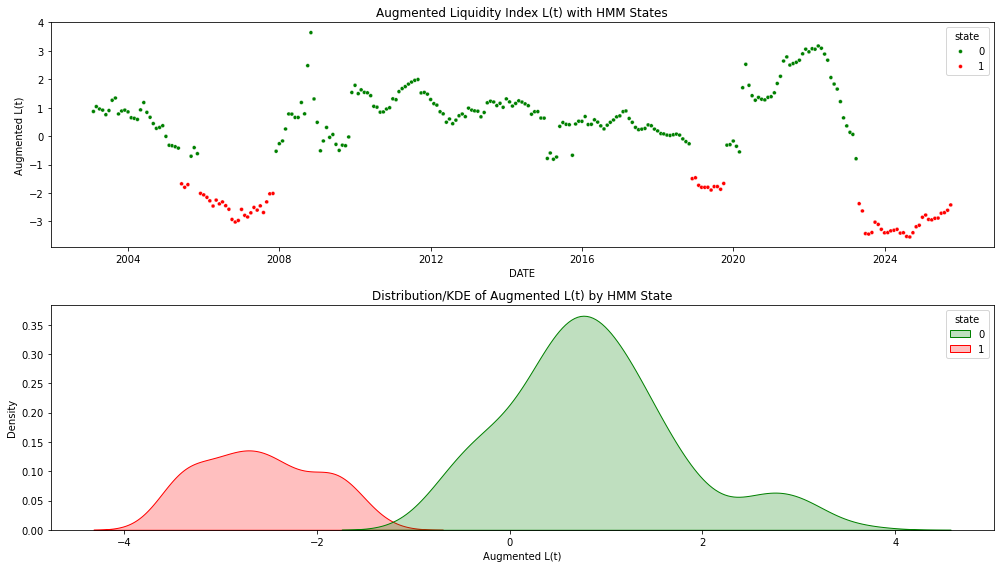

In [365]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=False)

# 1: Time series with regimes
sns.scatterplot(
    x=L1_t.index,
    y=L1_t.values,
    hue=regimes_aug_df["state"],
    palette={0: "green", 1: "red"},
    ax=ax[0],
    s=15
)
ax[0].set_title("Augmented Liquidity Index L(t) with HMM States")
ax[0].set_ylabel("Augmented L(t)")

# 2: KDE (distribution) by state
sns.kdeplot(
    data=regimes_aug_df,
    x="L",
    hue="state",
    fill=True,
    palette={0: "green", 1: "red"},
    ax=ax[1]
)
ax[1].set_title("Distribution/KDE of Augmented L(t) by HMM State")
ax[1].set_xlabel("Augmented L(t)")

plt.tight_layout()
plt.show()


In KDE of augmented liquidity index $L_t^{aug}$, clusters are clearly separated, unlike last one

#### Liquidity Vector w/ Momentum

In [369]:
def build_liquidity_proxies_with_momentum(macro_df: pd.DataFrame) -> pd.DataFrame:
    df = build_liquidity_proxies_augmented(macro_df)  # Your existing function
    
    # Add momentum features
    df["dL_3m"] = df["EM"].diff(3)  # 3-month change in excess M2
    df["dL_12m"] = df["EM"].diff(12)  # 12-month change
    df["dEB_dt"] = df["EB"].diff()  # Rate of Fed balance sheet expansion
    df["accel_ZIRP"] = df["ZIRP_dummy"].diff()  # Entry/exit from ZIRP
    
    cols_final = [
        "dlog_M2", "dlog_FED_BAL", "term_spread", "real_rate", "credit_spread",
        "EM", "EB", "EL_3y", "ZIRP_dummy",
        "dL_3m", "dL_12m", "dEB_dt", "accel_ZIRP"  # Momentum terms
    ]
    
    return df[cols_final].dropna()

liquidity_proxies_with_momentum = build_liquidity_proxies_with_momentum(macro_raw)
z2_t = standardize_and_signflip(liquidity_proxies_with_momentum)
L2_t = build_sparse_pca_liquidity_index(z2_t, alpha=0.5)
n_states=2
model, regimes_aug_mom_df = fit_hmm_on_liquidity(L2_t,n_states=n_states)

reg = regimes_aug_mom_df.copy()
reg.index = reg.index.to_period("M").to_timestamp("M")

# Join on month-end date
combined_aug_mom = reg.join(ff_adj, how="inner")
combined_aug_mom.tail()

SparsePCA components (loadings):
  dlog_M2: +0.306
  dlog_FED_BAL: +0.267
  term_spread: +0.284
  real_rate: +0.344
  credit_spread: -0.114
  EM: +0.080
  EB: +0.098
  EL_3y: +0.412
  ZIRP_dummy: +0.340
  dL_3m: +0.324
  dL_12m: +0.380
  dEB_dt: +0.267
  accel_ZIRP: +0.025

Top 3 variables by absolute loading:
  EL_3y: loading=+0.412, corr=+0.802, weighted=+0.331
  dL_12m: loading=+0.380, corr=+0.741, weighted=+0.281
  real_rate: loading=+0.344, corr=+0.675, weighted=+0.233

Weighted average correlation: +0.743
✅ Sign correct: L_t weighted correlation positive
HMM state means (unsorted, in fitted scale):
  state 0: mean L = -0.305
  state 1: mean L = 1.485


,L,state,p_state_0,p_state_1,state_label,mkt_excess,smb,hml,rmw,cma,rf
2025-05-31,-2.474098,0,0.999985,0.000015,Tight,0.0606,-0.0072,-0.0288,0.0129,0.0251,0.0038
2025-06-30,-2.179103,0,0.999980,0.000020,Tight,0.0486,-0.0002,-0.0161,-0.0320,0.0144,0.0034
2025-07-31,-2.252183,0,0.999981,0.000019,Tight,0.0198,-0.0015,-0.0127,-0.0029,-0.0207,0.0034
2025-08-31,-2.218250,0,0.999976,0.000024,Tight,0.0185,0.0488,0.0442,-0.0067,0.0208,0.0038
2025-09-30,-1.997313,0,0.999675,0.000325,Tight,0.0339,-0.0218,-0.0105,-0.0203,-0.0222,0.0033


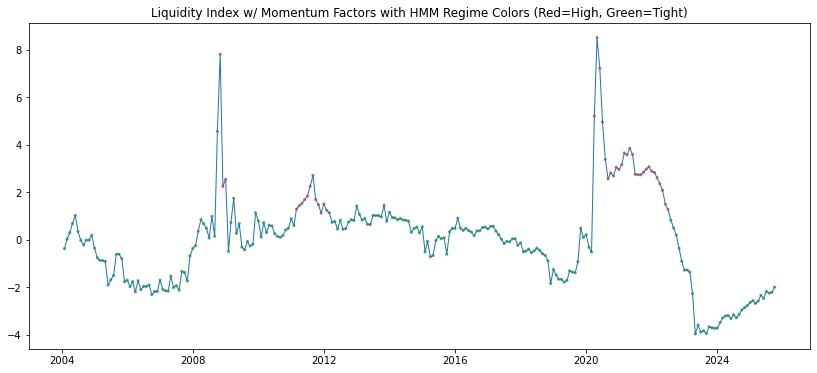

In [367]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(combined_aug_mom.index, combined_aug_mom['L'], label='L(t)', linewidth=1)

# Color by regime
colors = combined_aug_mom['state_label'].map({'High': 'red', 'Tight': 'green'})
ax.scatter(combined_aug_mom.index, combined_aug_mom['L'], c=colors, s=5, alpha=0.5)

ax.set_title('Liquidity Index w/ Momentum Factors with HMM Regime Colors (Red=High, Green=Tight)')
plt.show()

In [370]:
def classify_three_regimes(combined_aug):
    """
    Three-regime classification:
    1. Crisis: L spikes + VIX spikes + negative returns
    2. High: L > threshold, not crisis
    3. Tight: L < threshold, not crisis
    """
    df = combined_aug.copy()
    
    # Crisis indicator
    crisis = (
        ((df.index >= '2008-09') & (df.index <= '2009-03')) |
        ((df.index >= '2020-02') & (df.index <= '2020-04'))
    )
    
    # Regime classification
    df['regime_3state'] = 'Tight'  # default
    df.loc[df['L'] > 0, 'regime_3state'] = 'High'
    df.loc[crisis, 'regime_3state'] = 'Crisis'
    
    return df

# Apply three-regime classification
combined_3regime = classify_three_regimes(combined_aug_mom)

# Factor returns by 3 regimes
df_3regime = combined_3regime.copy()
df_3regime = df_3regime.dropna(subset=["regime_3state", "smb", "hml", "rmw", "cma"])

means_3regime = (
    df_3regime.groupby("regime_3state")[["mkt_excess", "hml", "rmw", "cma"]]
    .mean() * 100
)

print("\nFactor Returns by 3 Regimes (monthly %):")
print(means_3regime)


Factor Returns by 3 Regimes (monthly %):
               mkt_excess       hml       rmw       cma
regime_3state                                          
Crisis          -9.031250 -4.707500  0.975000  0.103750
High             1.375368  0.279191  0.363824  0.127206
Tight            0.860085 -0.108632  0.216068 -0.187350


In [329]:
# Define factors
factors = ['mkt_excess', 'hml', 'rmw', 'cma']
df4 = combined_aug_mom.copy()

# Regime at t (end-of-month) predicting factor returns at t+1
df4["state_label_lag1"] = df4["state_label"].shift(-1)

# Calculate statistics with ACCURATE annualization
stats_df_aug_mom = calculate_factor_statistics_by_regime_accurate(
    df4, 
    factor_cols, 
    regime_col='state_label_lag1',
    regime_order=['High', 'Neutral', 'Tight']
)

# Print formatted table (like your image but with accurate formulas)
print_formatted_table_accurate(stats_df_aug_mom, regime_order=['High', 'Tight'], show_geometric=True)


FACTOR RETURNS BY REGIME (Monthly)
                   Mean Return                   Std Dev              Sharpe Ratio
Factor       High       Tight         High       Tight         High       Tight 
------------------------------------------------------------------------------------------
MKT_EXCESS      0.09%       0.97%        6.40%       3.84%        0.014       0.252 
HML         0.16%      -0.10%        4.72%       2.73%        0.033      -0.037 
RMW         1.11%       0.17%        2.56%       1.67%        0.436       0.103 
CMA         0.59%      -0.15%        2.55%       1.72%        0.231      -0.089 

Annualized (geometric compounding: (1+r_m)^12-1; volatility: σ_m*√12)
------------------------------------------------------------------------------------------
MKT_EXCESS       1.1%       12.3%        22.2%       13.3%        0.049       0.875 
HML          1.9%       -1.2%        16.4%        9.5%        0.115      -0.128 
RMW         14.2%        2.1%         8.9%        5.8

### S&P 500 monthly prices

### CAPE Data from https://shillerdata.com/

In [421]:
import pandas as pd
import numpy as np

def parse_yyyy_mm_to_date(s: str):
    """
    Convert 'YYYY.MM' to a proper datetime.
    Handles the special case where October appears as YYYY.1 instead of YYYY.10.
    """
    s = str(s).strip()
    parts = s.split(".")
    if len(parts) != 2:
        raise ValueError(f"Unexpected date format: {s}")
    
    year = int(parts[0])
    mm = parts[1]

    # Fix: "1" should be "10" (October)
    if mm == "1":
        month = 10
    else:
        month = int(mm)

    return pd.Timestamp(year=year, month=month, day=1)

# --- Load CAPE CSV ---
sp500_cape_raw = pd.read_csv("data/sp500-cape-1990-2025.csv")

# Clean + parse
sp500_cape_raw["date"] = sp500_cape_raw["Date"].apply(parse_yyyy_mm_to_date)

sp500_cape_raw = (
    sp500_cape_raw[["date", "SP500", "CAPE"]]
    .set_index("date")
    .sort_index()
)

# Convert to month-end aligned CAPE series
sp500_cape_m = sp500_cape_raw.resample("M").last()
sp500_cape_m.rename(columns={"CAPE": "cape", "SP500": "sp500"}, inplace=True)

sp500_cape_m.tail()


,sp500,cape
date,,
2025-08-31,6408.95,37.85
2025-09-30,6584.02,38.58
2025-10-31,6735.69,39.21
2025-11-30,6740.89,39.12
2025-12-31,6812.63,39.42


### From valuation levels into a spread series

**Long-Term Average/Median**: 
The S&P 500's historical long-term average CAPE ratio is around 16-18, with a median value of approximately 16.04 (since 1881). This provides a central benchmark.

**High Valuation (Expensive)**: 
A CAPE ratio that is notably higher than the historical average (e.g., above 25 or 30) is considered indicative of a highly valued or overvalued market. Historically, values exceeding 30 have only occurred during major market peaks like the 1929 crash, the dot-com bubble in the late 1990s (peaking over 44), and the post-pandemic period around 2021. Such high readings have typically been followed by periods of lower-than-average, or even negative, long-term returns.

**Low Valuation (Cheap)**: A CAPE ratio well below the historical average (e.g., below 15 or 10) suggests an undervalued or cheap market. Historically, such levels have been associated with minimal downside risk and higher average long-term returns.

Could have calculated

```python
V_spread = (x - baseline) / baseline # baseline = 16
```

Problem is, if the whole world "structurally" shifted (e.g. post-1990 lower inflation), "16" stops being meaningful.

We are instead measuring,

$$
V_t = \frac{CAPE_t - \mathrm{median}(CAPE)}{\mathrm{IQR}(CAPE)}
$$


In [422]:
def build_valuation_spread_baseline(
    val_df: pd.DataFrame,
    metric: str = "cape",
    baseline: float = None,
    scale: bool = True,
) -> pd.Series:
    x = val_df[metric].astype(float)

    if baseline is None:
        # robust long-run baseline
        median = x.median()
        iqr = x.quantile(0.75) - x.quantile(0.25)
        baseline = median
        denom = iqr if scale and iqr > 0 else baseline
    else:
        denom = baseline if scale else 1.0

    diff = x - baseline          

    V_spread = diff / denom if scale else diff
    V_spread.name = "V_spread"
    return V_spread

# Example: baseline at 16.04 (long-run median)
V_spread_t = build_valuation_spread_baseline(
    sp500_cape_m,
    metric="cape",
    baseline=None,
    scale=True,   # or False if you prefer "CAPE points below baseline"
)

V_spread_t.tail()

date
2025-08-31    1.259380
2025-09-30    1.338771
2025-10-31    1.407287
2025-11-30    1.397499
2025-12-31    1.430125
Freq: M, Name: V_spread, dtype: float64

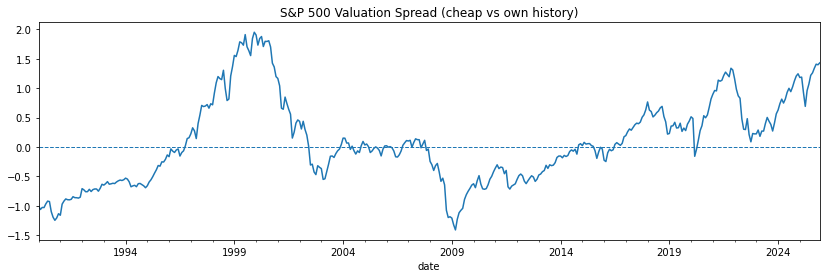

In [423]:
V_spread_t.plot(figsize=(14, 4), title="S&P 500 Valuation Spread (cheap vs own history)")
plt.axhline(0, linestyle="--", linewidth=1)
plt.show()

### Combine Liquidity Regime with Valuation Spread

In [424]:
regimes_df.tail()

,L,state,p_state_0,p_state_1,p_state_2,state_label
DATE,,,,,,
2025-06-30,-1.384971,2,1.763643e-10,3.461616e-08,1.000000,Tight
2025-07-31,-1.481025,2,4.213931e-09,1.477532e-08,1.000000,Tight
2025-08-31,-1.480004,2,1.745053e-07,1.492070e-08,1.000000,Tight
2025-09-30,-1.248705,2,7.336618e-06,1.134537e-07,0.999993,Tight
2025-11-30,-1.620391,2,2.921088e-04,2.068795e-07,0.999708,Tight


In [425]:
combined_aug.tail()

,L,state,p_state_0,p_state_1,state_label,mkt_excess,smb,hml,rmw,cma,rf
2025-05-31,-2.880509,1,1.340116e-07,1.000000,Tight,0.0606,-0.0072,-0.0288,0.0129,0.0251,0.0038
2025-06-30,-2.709857,1,2.610193e-07,1.000000,Tight,0.0486,-0.0002,-0.0161,-0.0320,0.0144,0.0034
2025-07-31,-2.689149,1,2.839775e-07,1.000000,Tight,0.0198,-0.0015,-0.0127,-0.0029,-0.0207,0.0034
2025-08-31,-2.606319,1,4.195012e-07,1.000000,Tight,0.0185,0.0488,0.0442,-0.0067,0.0208,0.0038
2025-09-30,-2.418377,1,4.483466e-05,0.999955,Tight,0.0339,-0.0218,-0.0105,-0.0203,-0.0222,0.0033


In [426]:
# regimes_df: index is month-end
reg = combined_aug.copy()
reg.index = reg.index.to_period("M").to_timestamp("M")

# Align valuation spread to month-end, then join
V_spread_m = V_spread_t.resample("M").last()

combined_aug_val = (
    reg
    .join(V_spread_m.to_frame(), how="inner")
)

combined_aug_val.tail()

,L,state,p_state_0,p_state_1,state_label,mkt_excess,smb,hml,rmw,cma,rf,V_spread
2025-05-31,-2.880509,1,1.340116e-07,1.000000,Tight,0.0606,-0.0072,-0.0288,0.0129,0.0251,0.0038,0.958129
2025-06-30,-2.709857,1,2.610193e-07,1.000000,Tight,0.0486,-0.0002,-0.0161,-0.0320,0.0144,0.0034,1.070147
2025-07-31,-2.689149,1,2.839775e-07,1.000000,Tight,0.0198,-0.0015,-0.0127,-0.0029,-0.0207,0.0034,1.218053
2025-08-31,-2.606319,1,4.195012e-07,1.000000,Tight,0.0185,0.0488,0.0442,-0.0067,0.0208,0.0038,1.259380
2025-09-30,-2.418377,1,4.483466e-05,0.999955,Tight,0.0339,-0.0218,-0.0105,-0.0203,-0.0222,0.0033,1.338771


In [413]:
def cart_with_valuation_3d(combined_aug, sp500_cape_m):
    """
    Three-dimensional CART: Liquidity × Volatility × Valuation
    This should resolve the 2010-2014 and 2023-2024 anomalies.
    """
    df = combined_aug.copy()
    df['L_std'] = df['L'] / df['L'].std()
    
    # Build valuation spread
    x = sp500_cape_m['cape'].astype(float)
    median = x.median()
    iqr = x.quantile(0.75) - x.quantile(0.25)
    V_spread = (x - median) / iqr
    V_spread.name = "V_spread"
    
    # Align to month-end
    V_spread_m = V_spread.resample("M").last()
    
    # ==========================================
    # Crisis Detection
    # ==========================================
    print("="*80)
    print("3D CART: Liquidity × Volatility × Valuation")
    print("="*80)
    
    df['ret_vol'] = df['mkt_excess'].rolling(6).std()
    df['L_vol'] = df['L_std'].rolling(3).std()
    df['abs_ret'] = df['mkt_excess'].abs()
    df['cum_ret_3m'] = (1 + df['mkt_excess']).rolling(3).apply(lambda x: x.prod()) - 1
    
    crisis_features = df[['ret_vol', 'abs_ret', 'cum_ret_3m', 'L_vol']].dropna()
    
    from sklearn.ensemble import IsolationForest
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    outlier_labels = iso_forest.fit_predict(crisis_features.values)
    
    df['is_crisis'] = False
    df.loc[crisis_features.index, 'is_crisis'] = (outlier_labels == -1) & (df.loc[crisis_features.index, 'mkt_excess'] < -0.02)
    
    print(f"Crisis months: {df['is_crisis'].sum()}")
    
    # ==========================================
    # Join Valuation
    # ==========================================
    df_normal = df[~df['is_crisis']].copy()
    df_with_val = df_normal.join(V_spread_m.to_frame(), how='inner')
    
    print(f"\nData with valuation: {len(df_with_val)} months")
    
    # Clean data
    df_clean = df_with_val[['L_std', 'ret_vol', 'V_spread', 'hml', 'rmw', 'cma']].dropna()
    
    print(f"Clean data: {len(df_clean)} months")
    print(f"\nValuation spread stats:")
    print(f"  Mean: {df_clean['V_spread'].mean():+.2f}")
    print(f"  Std:  {df_clean['V_spread'].std():.2f}")
    print(f"  Min:  {df_clean['V_spread'].min():+.2f}")
    print(f"  Max:  {df_clean['V_spread'].max():+.2f}")
    
    # ==========================================
    # Create Target
    # ==========================================
    hml_quantiles = pd.qcut(df_clean['hml'], q=3, labels=['Growth', 'Neutral', 'Value'])
    df_clean['target'] = hml_quantiles
    
    print(f"\nTarget distribution:")
    print(df_clean['target'].value_counts())
    
    # ==========================================
    # Train 3D CART
    # ==========================================
    print("\n" + "="*80)
    print("TRAINING 3D CART")
    print("="*80)
    
    # THREE features now: L_std, ret_vol, V_spread
    X = df_clean[['L_std', 'ret_vol', 'V_spread']].values
    y = df_clean['target'].values
    
    from sklearn.tree import DecisionTreeClassifier, export_text
    
    cart_3d = DecisionTreeClassifier(
        max_depth=4,  # Deeper tree for 3 dimensions
        min_samples_leaf=20,
        random_state=42
    )
    
    cart_3d.fit(X, y)
    
    print("\nLearned Decision Rules:")
    tree_rules = export_text(cart_3d, feature_names=['L_std', 'ret_vol', 'V_spread'])
    print(tree_rules)
    
    print("\nFeature Importance:")
    for i, feat in enumerate(['L_std', 'ret_vol', 'V_spread']):
        print(f"  {feat:12s}: {cart_3d.feature_importances_[i]:.3f}")
    
    # ==========================================
    # Predictions
    # ==========================================
    predictions = cart_3d.predict(X)
    df_clean['cart_prediction'] = predictions
    
    # ==========================================
    # Characterize Classes
    # ==========================================
    print("\n" + "="*80)
    print("REGIME CHARACTERIZATION (3D)")
    print("="*80)
    
    regime_chars = []
    
    for pred_class in ['Growth', 'Neutral', 'Value']:
        mask = df_clean['cart_prediction'] == pred_class
        subset = df_clean[mask]
        
        if len(subset) == 0:
            continue
        
        char = {
            'class': pred_class,
            'n': len(subset),
            'L_std': subset['L_std'].mean(),
            'vol': subset['ret_vol'].mean(),
            'V_spread': subset['V_spread'].mean(),
            'hml': subset['hml'].mean() * 100,
            'rmw': subset['rmw'].mean() * 100,
            'cma': subset['cma'].mean() * 100,
        }
        
        # Economic interpretation
        if char['L_std'] > 0.5:
            liq = "High_Liq"
        elif char['L_std'] < -0.5:
            liq = "Tight_Liq"
        else:
            liq = "Neutral_Liq"
        
        if char['V_spread'] > 0.5:
            val = "Expensive"
        elif char['V_spread'] < -0.5:
            val = "Cheap"
        else:
            val = "Fair"
        
        regime = f"{liq}_{val}"
        char['regime'] = regime
        
        regime_chars.append(char)
    
    # Print table
    print(f"\n{'Class':<10} {'Regime':<25} {'N':<5} {'L_std':<8} {'V_spread':<10} {'HML%':<8}")
    print("-" * 85)
    
    for char in sorted(regime_chars, key=lambda x: x['hml'], reverse=True):
        print(f"{char['class']:<10} {char['regime']:<25} {char['n']:<5} "
              f"{char['L_std']:>+6.2f}  {char['V_spread']:>+8.2f}  {char['hml']:>+6.2f}")
    
    # ==========================================
    # Validation
    # ==========================================
    print("\n" + "="*80)
    print("VALIDATION: Known Periods")
    print("="*80)
    
    known = {
        '2010-2014 QE': ('2010-01', '2014-12'),
        '2015-2019 Late Cycle': ('2015-01', '2019-12'),
        '2020-2021 Reopening': ('2020-05', '2021-12'),
        '2022-2024 QT': ('2022-03', '2024-12'),
    }
    
    for label, (start, end) in known.items():
        period = df_clean.loc[start:end]
        
        if len(period) == 0:
            continue
        
        dist = period['cart_prediction'].value_counts()
        mode = dist.idxmax()
        
        mean_L = period['L_std'].mean()
        mean_V = period['V_spread'].mean()
        mean_hml = period['hml'].mean() * 100
        
        print(f"\n{label}:")
        print(f"  Classified: {mode} ({dist.get(mode, 0)}/{len(period)})")
        print(f"  L_std={mean_L:+.2f}, V_spread={mean_V:+.2f}, HML={mean_hml:+.2f}%")
        print(f"  Distribution: {dist.to_dict()}")
    
    return df_clean, cart_3d, regime_chars

# RUN 3D CART
df_3d, cart_3d_model, chars_3d = cart_with_valuation_3d(combined_aug_mom, sp500_cape_m)

3D CART: Liquidity × Volatility × Valuation
Crisis months: 5

Data with valuation: 256 months
Clean data: 251 months

Valuation spread stats:
  Mean: +0.10
  Std:  0.56
  Min:  -1.41
  Max:  +1.34

Target distribution:
target
Growth     85
Value      84
Neutral    82
Name: count, dtype: int64

TRAINING 3D CART

Learned Decision Rules:
|--- V_spread <= 0.04
|   |--- ret_vol <= 0.02
|   |   |--- class: Value
|   |--- ret_vol >  0.02
|   |   |--- ret_vol <= 0.03
|   |   |   |--- class: Neutral
|   |   |--- ret_vol >  0.03
|   |   |   |--- V_spread <= -0.63
|   |   |   |   |--- class: Growth
|   |   |   |--- V_spread >  -0.63
|   |   |   |   |--- class: Value
|--- V_spread >  0.04
|   |--- V_spread <= 0.82
|   |   |--- L_std <= 0.10
|   |   |   |--- ret_vol <= 0.05
|   |   |   |   |--- class: Growth
|   |   |   |--- ret_vol >  0.05
|   |   |   |   |--- class: Growth
|   |   |--- L_std >  0.10
|   |   |   |--- class: Growth
|   |--- V_spread >  0.82
|   |   |--- class: Value


Feature Impor

In [427]:
combined_aug_val.tail()

,L,state,p_state_0,p_state_1,state_label,mkt_excess,smb,hml,rmw,cma,rf,V_spread
2025-05-31,-2.880509,1,1.340116e-07,1.000000,Tight,0.0606,-0.0072,-0.0288,0.0129,0.0251,0.0038,0.958129
2025-06-30,-2.709857,1,2.610193e-07,1.000000,Tight,0.0486,-0.0002,-0.0161,-0.0320,0.0144,0.0034,1.070147
2025-07-31,-2.689149,1,2.839775e-07,1.000000,Tight,0.0198,-0.0015,-0.0127,-0.0029,-0.0207,0.0034,1.218053
2025-08-31,-2.606319,1,4.195012e-07,1.000000,Tight,0.0185,0.0488,0.0442,-0.0067,0.0208,0.0038,1.259380
2025-09-30,-2.418377,1,4.483466e-05,0.999955,Tight,0.0339,-0.0218,-0.0105,-0.0203,-0.0222,0.0033,1.338771


In [432]:
def test_liquidity_predicts_valuation(combined_aug):
    """
    Test if L(t) predicts V_spread(t+k) using Granger causality.
    """
    import pandas as pd
    from scipy import stats
    
    print("="*80)
    print("TEST 1: Does Liquidity Predict Future Valuation?")
    print("="*80)
    
    df = combined_aug.copy()
    
    # Test different lags
    for lag in [3, 6, 12, 24]:
        df[f'V_lead_{lag}m'] = df['V_spread'].shift(-lag)
        
        # Clean data
        valid = df[['L', f'V_lead_{lag}m']].dropna()
        
        if len(valid) < 30:
            continue
        
        # Regression: V(t+k) = α + β*L(t) + ε
        from scipy.stats import pearsonr, linregress
        
        slope, intercept, r_value, p_value, std_err = linregress(
            valid['L'], 
            valid[f'V_lead_{lag}m']
        )
        
        r_squared = r_value ** 2
        
        print(f"\nLag = {lag} months:")
        print(f"  L(t) → V(t+{lag})")
        print(f"  Coefficient: {slope:+.3f}")
        print(f"  R²: {r_squared:.3f}")
        print(f"  p-value: {p_value:.4f}")
        
        if p_value < 0.05:
            print(f"  ✅ Liquidity DOES predict valuation {lag} months ahead!")
        else:
            print(f"  ❌ No significant relationship")

test_liquidity_predicts_valuation(combined_aug_val)

TEST 1: Does Liquidity Predict Future Valuation?

Lag = 3 months:
  L(t) → V(t+3)
  Coefficient: -0.088
  R²: 0.070
  p-value: 0.0000
  ✅ Liquidity DOES predict valuation 3 months ahead!

Lag = 6 months:
  L(t) → V(t+6)
  Coefficient: -0.089
  R²: 0.071
  p-value: 0.0000
  ✅ Liquidity DOES predict valuation 6 months ahead!

Lag = 12 months:
  L(t) → V(t+12)
  Coefficient: -0.070
  R²: 0.040
  p-value: 0.0012
  ✅ Liquidity DOES predict valuation 12 months ahead!

Lag = 24 months:
  L(t) → V(t+24)
  Coefficient: +0.032
  R²: 0.006
  p-value: 0.2076
  ❌ No significant relationship


In [434]:
def granger_liquidity_to_valuation(df, max_lag=24):
    """
    Proper Granger causality test:
    Does L Granger-cause V_spread?
    """

    import pandas as pd
    from statsmodels.tsa.stattools import grangercausalitytests

    print("="*90)
    print("GRANGER CAUSALITY TEST: L → V_spread")
    print("="*90)

    # Keep only required columns
    data = df[['V_spread', 'L']].dropna()

    # statsmodels expects: [target, predictor]
    # Test whether L causes V_spread
    results = grangercausalitytests(
        data,
        maxlag=max_lag,
        verbose=False
    )

    print("\nLag | F-stat p-value | χ² p-value | Verdict")
    print("-"*70)

    for lag in range(1, max_lag + 1):
        f_pval = results[lag][0]['ssr_ftest'][1]
        chi2_pval = results[lag][0]['ssr_chi2test'][1]

        verdict = "✅ YES" if f_pval < 0.05 else "❌ NO"

        print(f"{lag:>3} | {f_pval:>13.4f} | {chi2_pval:>11.4f} | {verdict}")


granger_liquidity_to_valuation(combined_aug_val, max_lag=24)


GRANGER CAUSALITY TEST: L → V_spread

Lag | F-stat p-value | χ² p-value | Verdict
----------------------------------------------------------------------
  1 |        0.0899 |      0.0870 | ❌ NO
  2 |        0.3760 |      0.3678 | ❌ NO
  3 |        0.4680 |      0.4547 | ❌ NO
  4 |        0.5816 |      0.5640 | ❌ NO
  5 |        0.5879 |      0.5636 | ❌ NO
  6 |        0.5844 |      0.5522 | ❌ NO
  7 |        0.7117 |      0.6789 | ❌ NO
  8 |        0.6999 |      0.6582 | ❌ NO
  9 |        0.6900 |      0.6385 | ❌ NO
 10 |        0.8036 |      0.7585 | ❌ NO
 11 |        0.8664 |      0.8266 | ❌ NO
 12 |        0.8785 |      0.8352 | ❌ NO
 13 |        0.8521 |      0.7936 | ❌ NO
 14 |        0.8598 |      0.7951 | ❌ NO
 15 |        0.8944 |      0.8348 | ❌ NO
 16 |        0.9224 |      0.8691 | ❌ NO
 17 |        0.8087 |      0.6924 | ❌ NO
 18 |        0.8156 |      0.6886 | ❌ NO
 19 |        0.8553 |      0.7343 | ❌ NO
 20 |        0.8645 |      0.7355 | ❌ NO
 21 |        0.9428 |      

/Users/dbose/anaconda3/envs/py-data/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


### Regime-conditional valuation spreads

### Valuation Spreads & Factor Returns by Regime Math

(Valuation spread series, e.g. top–bottom decile)

$ V_t^{\text{spread}} $

(Regime-conditional mean valuation spread)

$ \bar{V}^{(k)} = \mathbb{E}\big[ V_t^{\text{spread}} \mid s_t = k \big] $

$ \hat{\bar{V}}^{(k)} =
\frac{\sum_{t=1}^T V_t^{\text{spread}} \cdot \mathbf{1}(\hat{s}_{t} = k)}
{\sum_{t=1}^T \mathbf{1}(\hat{s}_t = k)} $

(Difference in spreads between regimes)

$ \hat{\bar{V}}^{(\text{High})} - \hat{\bar{V}}^{(\text{Tight})} $

(Factor return in regime ( k ))

$ r_t^{(F)} $

$ \bar{r}_F^{(k)} = \mathbb{E}\big[ r_t^{(F)} \mid s_t = k \big] $

$ \hat{\bar{r}}_F^{(k)} =
\frac{\sum_{t=1}^T r_t^{(F)} \cdot \mathbf{1}(\hat{s}_t = k)}
{\sum_{t=1}^T \mathbf{1}(\hat{s}_t = k)} $

(Regime-specific Sharpe ratio)

$ \text{SR}_F^{(k)} = \frac{\hat{\bar{r}}_F^{(k)}}{\hat{\sigma}_F^{(k)}} $

In [124]:
# Regime-conditional mean valuation spread:  V̄^(k)
val_means_by_regime = (
    combined_aug_val
    .groupby("state_label")["V_spread"]
    .mean()
)

val_stds_by_regime = (
    combined_aug_val
    .groupby("state_label")["V_spread"]
    .std()
)

print("Regime-conditional mean valuation spread:")
print(val_means_by_regime)

print("\nRegime-conditional valuation z-score std dev:")
print(val_stds_by_regime)

# Difference in spreads between regimes:  V̂^(High) − V̂^(Tight)
if {"High", "Tight"}.issubset(val_means_by_regime.index):
    spread_diff = (
        val_means_by_regime["High"] - val_means_by_regime["Tight"]
    )
    print("\nDifference in spreads High − Tight:")
    print(spread_diff)


Regime-conditional mean valuation spread:
state_label
High    -0.049269
Tight    0.419617
Name: V_spread, dtype: float64

Regime-conditional valuation z-score std dev:
state_label
High     0.551632
Tight    0.438484
Name: V_spread, dtype: float64

Difference in spreads High − Tight:
-0.4688859970837499


### Insigts

- Tight liquidity = cheaper markets (value regime),
- High liquidity = expensive markets (growth regime).

> Markets are ~0.43σ more expensive in High liquidity regimes than Tight liquidity regimes.

### Plot L(t), S&P 500, and V_spread_t together with regime shading,

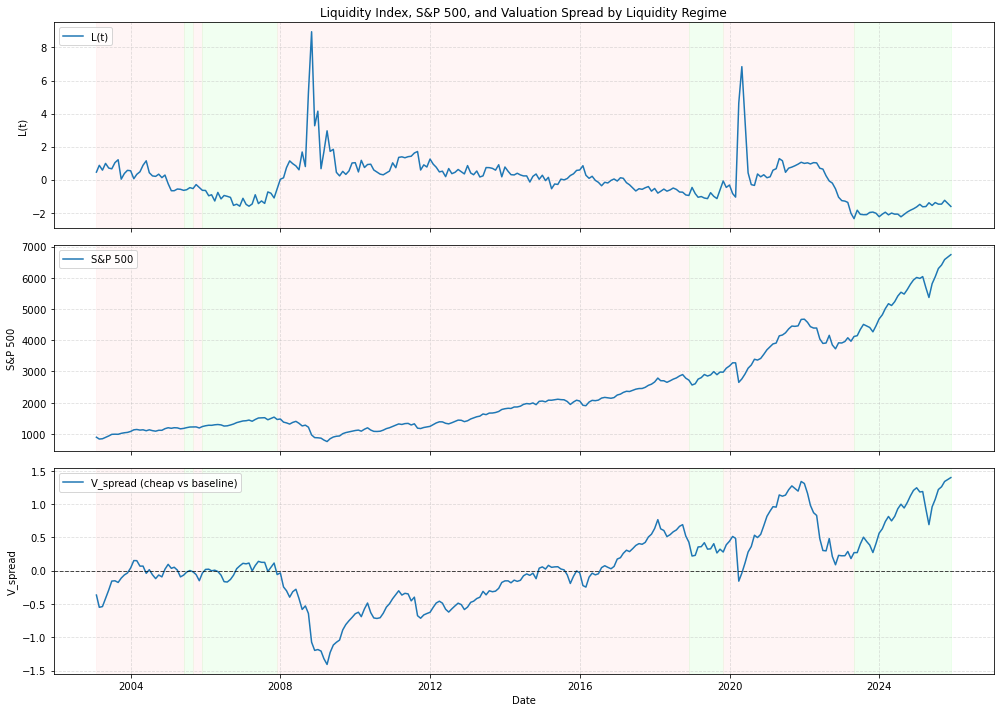

In [125]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# -------------------------------------------------------------------
# Assume you already have:
#   L_t              : pd.Series (liquidity index), monthly, name "L"
#   sp500_cape_m     : DataFrame with column "sp500" (S&P 500)
#   V_spread_t       : pd.Series ("V_spread"), monthly valuation cheapness
#   regimes_df       : DataFrame with column "state_label"
# -------------------------------------------------------------------

# 1) Build a common monthly dataframe
df_plot = pd.DataFrame(index=L_t.index.union(sp500_cape_m.index).union(V_spread_t.index))

df_plot["L"]         = L_t.reindex(df_plot.index)
df_plot["spx_price"] = sp500_cape_m["sp500"].reindex(df_plot.index)
df_plot["V_spread"]  = V_spread_t.reindex(df_plot.index)

# Attach regimes (forward-fill in case of any slight index mismatch)
reg_states = combined_aug_val["state_label"].reindex(df_plot.index).ffill()
df_plot["state_label"] = reg_states

# Optional: drop rows before we have all three series
df_plot = df_plot.dropna(subset=["L", "spx_price", "V_spread", "state_label"])

# 2) Helper: find contiguous regime segments for shading
def get_regime_segments(states: pd.Series):
    """
    Given a Series of regime labels indexed by date,
    return list of (start_date, end_date, label) segments
    where the label is constant.
    """
    segments = []
    prev_label = None
    start_date = None

    for dt, label in states.items():
        if prev_label is None:
            prev_label = label
            start_date = dt
            continue

        if label != prev_label:
            # segment ended at previous date
            end_date = dt
            segments.append((start_date, end_date, prev_label))
            start_date = dt
            prev_label = label

    # last segment
    if prev_label is not None and start_date is not None:
        segments.append((start_date, states.index[-1], prev_label))

    return segments

segments = get_regime_segments(df_plot["state_label"])

# 3) Colors for regimes
regime_colors = {
    "High":    "#ffe0e0",  # pale red
    "Neutral": "#f7f7f7",  # light gray
    "Tight":   "#d1ffd1",  # pale green
}

# 4) Plot: 3 stacked subplots with shared x-axis
fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True,
                         gridspec_kw={"height_ratios": [1, 1, 1]})

ax_L, ax_spx, ax_val = axes

# --- Shading first so lines render on top ---
for (start, end, label) in segments:
    color = regime_colors.get(label, "#f0f0f0")
    for ax in axes:
        ax.axvspan(start, end, color=color, alpha=0.3)

# --- Panel 1: Liquidity index L(t) ---
ax_L.plot(df_plot.index, df_plot["L"], label="L(t)", linewidth=1.5)
ax_L.set_ylabel("L(t)")
ax_L.set_title("Liquidity Index, S&P 500, and Valuation Spread by Liquidity Regime")
ax_L.grid(True, linestyle="--", alpha=0.4)

# --- Panel 2: S&P 500 level ---
ax_spx.plot(df_plot.index, df_plot["spx_price"], label="S&P 500", linewidth=1.5)
ax_spx.set_ylabel("S&P 500")
ax_spx.grid(True, linestyle="--", alpha=0.4)

# --- Panel 3: Valuation cheapness (V_spread) ---
ax_val.plot(df_plot.index, df_plot["V_spread"], label="V_spread (cheap vs baseline)", linewidth=1.5)
ax_val.axhline(0.0, color="black", linewidth=1, linestyle="--", alpha=0.7)
ax_val.set_ylabel("V_spread")
ax_val.set_xlabel("Date")
ax_val.grid(True, linestyle="--", alpha=0.4)

# Optional legends
ax_L.legend(loc="upper left")
ax_spx.legend(loc="upper left")
ax_val.legend(loc="upper left")

fig.tight_layout()
plt.show()
